<a href="https://colab.research.google.com/github/DavBelM/Multimodal_Data_Preprocessing/blob/main/Formative2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

We begin by importing essential Python libraries for data manipulation, visualization, and machine learning. Pandas and NumPy handle data processing, Seaborn and Matplotlib provide visualization capabilities, and Scikit-learn offers preprocessing tools. We suppress warnings to maintain clean output.


In [201]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Display Settings

Configuring pandas to show all columns and up to 100 rows ensures we can fully inspect our datasets. Setting a whitegrid style and larger figure size (12x6) provides clearer, more readable visualizations throughout the analysis.


In [202]:
# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Datasets

We load two CSV files: customer_social_profiles (containing social media engagement data) and customer_transactions (containing purchase history). These datasets will be merged to create comprehensive customer profiles for our multimodal system.


In [203]:
social = pd.read_csv('/content/customer_social_profiles - customer_social_profiles.csv')
transactions = pd.read_csv('/content/customer_transactions - customer_transactions.csv')

## Exploratory Data Analysis

## Social Profiles Dataset

Examining the social profiles data structure, types, and statistics. We check for missing values and duplicates to assess data quality. This dataset contains customer engagement metrics across social media platforms, purchase interest scores, and sentiment analysis of their reviews.

In [204]:
social.head()

customer_id_new social_media_platform  engagement_score  \
0            A178              LinkedIn                74   
1            A190               Twitter                82   
2            A150              Facebook                96   
3            A162               Twitter                89   
4            A197               Twitter                92   

   purchase_interest_score review_sentiment  
0                      4.9         Positive  
1                      4.8          Neutral  
2                      1.6         Positive  
3                      2.6         Positive  
4                      2.3          Neutral

In [205]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    object 
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.2+ KB


In [206]:
social.describe()

engagement_score  purchase_interest_score
count        155.000000               155.000000
mean          75.606452                 3.152903
std           14.568021                 1.142867
min           50.000000                 1.000000
25%           63.500000                 2.350000
50%           77.000000                 3.200000
75%           87.500000                 4.100000
max           99.000000                 5.000000

In [207]:
missing_social = social.isnull().sum()
missing_social_pct = (missing_social / len(social)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_social,
    'Percentage': missing_social_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

In [208]:
# Checking for duplicates
print(f"\n Duplicate Rows: {social.duplicated().sum()}")


 Duplicate Rows: 5


## Transactions Dataset

Analyzing the transactions data to understand purchase patterns. We examine data types, summary statistics, missing values, and duplicates. This dataset provides behavioral purchase history including amounts, product categories, and customer ratings.


In [209]:
transactions.head()


customer_id_legacy  transaction_id  purchase_amount purchase_date  \
0                 151            1001              408    2024-01-01   
1                 192            1002              332    2024-01-02   
2                 114            1003              442    2024-01-03   
3                 171            1004              256    2024-01-04   
4                 160            1005               64    2024-01-05   

  product_category  customer_rating  
0           Sports              2.3  
1      Electronics              4.2  
2      Electronics              2.1  
3         Clothing              2.8  
4         Clothing              1.3

In [210]:
transactions[transactions['customer_id_legacy'] == 150]

customer_id_legacy  transaction_id  purchase_amount purchase_date  \
41                 150            1042              389    2024-02-11   
45                 150            1046              177    2024-02-15   

   product_category  customer_rating  
41           Sports              NaN  
45            Books              3.6

In [211]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id_legacy  150 non-null    int64  
 1   transaction_id      150 non-null    int64  
 2   purchase_amount     150 non-null    int64  
 3   purchase_date       150 non-null    object 
 4   product_category    150 non-null    object 
 5   customer_rating     140 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 7.2+ KB


In [212]:
transactions.describe()

customer_id_legacy  transaction_id  purchase_amount  customer_rating
count          150.000000      150.000000       150.000000        140.00000
mean           148.760000     1075.500000       280.780000          2.98500
std             30.046425       43.445368       121.329595          1.20699
min            100.000000     1001.000000        51.000000          1.00000
25%            121.250000     1038.250000       179.000000          1.95000
50%            150.500000     1075.500000       274.000000          3.00000
75%            174.750000     1112.750000       388.500000          4.00000
max            199.000000     1150.000000       495.000000          5.00000

In [213]:
missing_trans = transactions.isnull().sum()
missing_trans_pct = (missing_trans / len(transactions)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_trans,
    'Percentage': missing_trans_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

Missing Count  Percentage
customer_rating             10    6.666667

In [214]:
print(f"\n Duplicate Rows: {transactions.duplicated().sum()}")


 Duplicate Rows: 0


## Visualization

Creating box plots to understand the distribution and identify outliers in numerical features:

**Social Profiles Box Plot (engagement_score & purchase_interest_score):**
- The engagement_score box shows the interquartile range (IQR) of user activity levels
- Outliers (points beyond whiskers) indicate unusually high or low engagement users
- The median line shows the typical engagement level across customers
- purchase_interest_score distribution reveals how likely customers are to convert

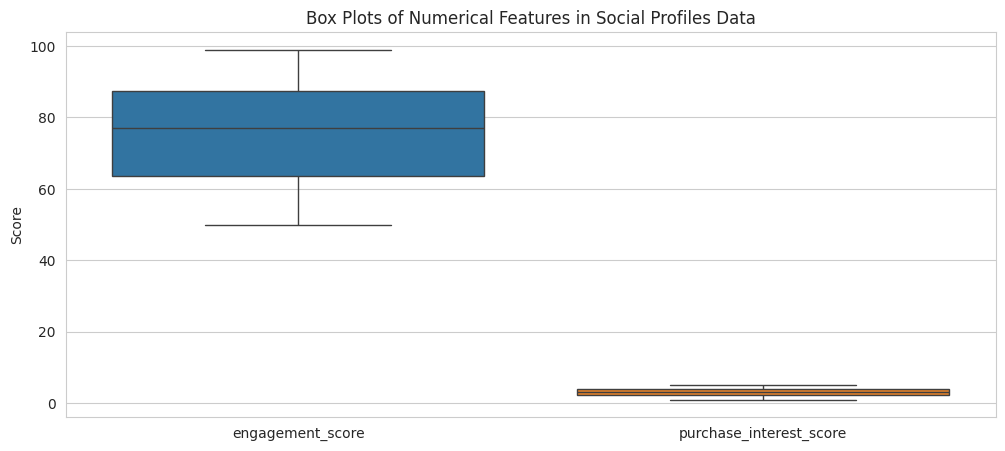

In [215]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=social[['engagement_score', 'purchase_interest_score']])
plt.title('Box Plots of Numerical Features in Social Profiles Data')
plt.ylabel('Score')
plt.show()

**Transactions Box Plot (purchase_amount & customer_rating):**
- purchase_amount distribution shows spending patterns - the box width indicates variability in customer spending
- Any outliers in purchase_amount may represent high-value customers or potential data errors
- customer_rating distribution should be relatively narrow if most customers are satisfied
- The median purchase amount and rating inform our understanding of typical customer behavior

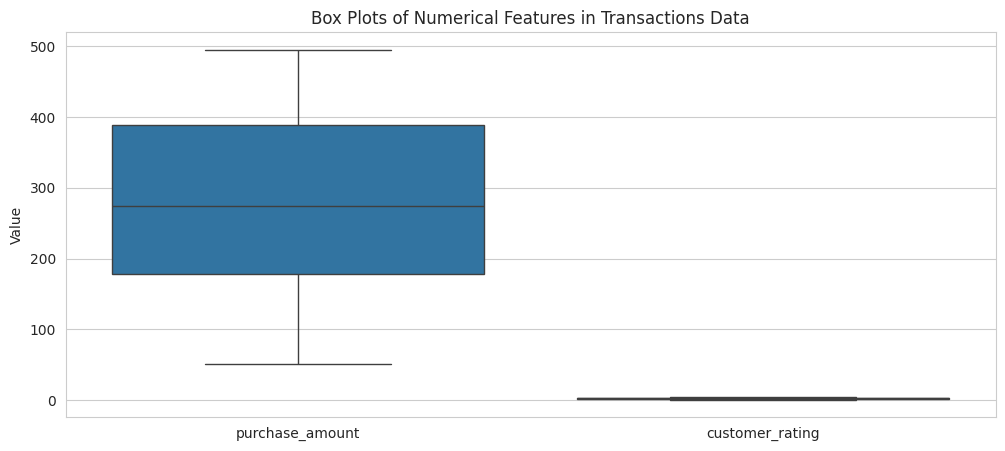

In [216]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=transactions[['purchase_amount', 'customer_rating']])
plt.title('Box Plots of Numerical Features in Transactions Data')
plt.ylabel('Value')
plt.show()

### Correlation Heatmap for Social Profiles Data

Analyzing the relationship between engagement_score and purchase_interest_score:

**Interpretation of Results:**
- A correlation close to **+1** would indicate that highly engaged users always have high purchase interest
- A correlation close to **-1** would indicate inverse relationship (engaged users have low purchase intent)
- A correlation close to **0** indicates these features are **independent predictors**

**Why This Matters:**
If the correlation is low (e.g., < 0.3), it means engagement and purchase interest capture different aspects of customer behavior. This is **beneficial for modeling** because:
- Each feature provides unique information
- Neither feature is redundant
- Together they offer richer predictive power than either alone

High engagement doesn't automatically mean high purchase intent - some users engage for information only, while others with moderate engagement may have strong buying intentions.

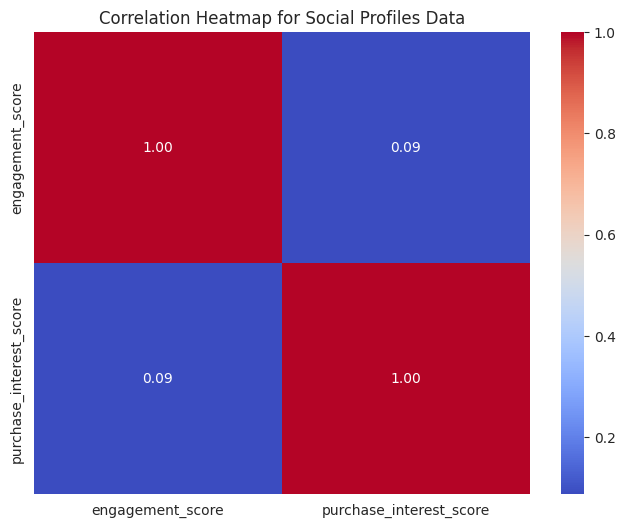

In [217]:
plt.figure(figsize=(8, 6))
sns.heatmap(social[['engagement_score', 'purchase_interest_score']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Social Profiles Data')
plt.show()

### Correlation Heatmap for Transactions Data

Examining the relationship between purchase_amount and customer_rating:

**Expected Patterns:**
- **Positive correlation**: Higher spenders tend to rate products higher (satisfaction with premium products)
- **Negative correlation**: Higher spenders are more critical (higher expectations)
- **No correlation**: Spending amount doesn't predict satisfaction

**Business Insights:**
- If correlation is weak, it suggests rating is independent of price point
- This means product quality/service matters more than purchase amount
- Low-spending customers can be just as satisfied as high-spending ones


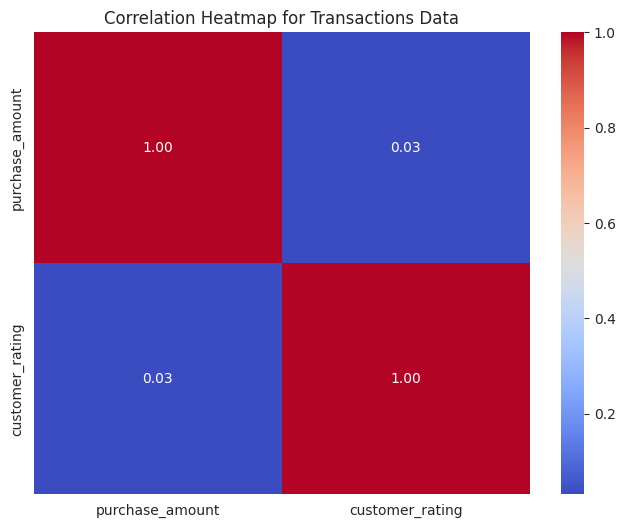

In [218]:
plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['purchase_amount', 'customer_rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Transactions Data')
plt.show()

## Data Cleaning

## Handling Missing Values

Addressing missing values in the customer_rating column using mean imputation:

**Why Mean Imputation?**
- Preserves the overall rating distribution
- Doesn't introduce bias toward extreme values
- Appropriate for ratings which typically follow normal distribution
- Missing ratings likely represent customers who didn't leave feedback, not systematic bias

**Alternative Approaches Considered:**
- Median imputation (more robust to outliers)
- Mode imputation (most common rating)
- Dropping rows (loses valuable transaction data)

Mean imputation balances data preservation with statistical soundness for our use case.

In [219]:
transactions['customer_rating'].fillna(transactions['customer_rating'].mean(), inplace=True)

## Handle Duplicates

Removing duplicate rows from the transactions dataset:

**Why Remove Duplicates?**
- Prevents double-counting transactions in aggregations
- Ensures each purchase event is unique
- Avoids artificially inflating certain customer behaviors
- Maintains data integrity for accurate model training

**Impact:**
After removal, each row represents a single, unique transaction event, ensuring our aggregated customer profiles accurately reflect their true purchase behavior.

In [220]:
transactions = transactions.drop_duplicates()

## Change Data Types

Converting columns to appropriate data types for analysis:

**purchase_date → datetime:**
- Enables time-based analysis (seasonal patterns, recency)
- Allows date calculations and filtering
- Proper temporal ordering of transactions

**customer_id_new: Extract numeric ID ('A178' → 178):**
- Standardizes format to match transactions dataset (numeric IDs)
- Enables merging between datasets on common customer identifier
- Removes alphabetic prefix while preserving unique customer number

These conversions are essential for successful data merging and feature engineering.

In [221]:
transactions['purchase_date'] = pd.to_datetime(transactions['purchase_date'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id_legacy  150 non-null    int64         
 1   transaction_id      150 non-null    int64         
 2   purchase_amount     150 non-null    int64         
 3   purchase_date       150 non-null    datetime64[ns]
 4   product_category    150 non-null    object        
 5   customer_rating     150 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 7.2+ KB


In [222]:
social['customer_id_new'] = social['customer_id_new'].str.extract('(\\d+)').astype(int)
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id_new          155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB


## Data Merge

Combining social profiles and transaction data to create comprehensive customer records:

**Merge Strategy:**
1. **Rename columns** to have consistent 'customer_id' in both datasets
2. **Inner join** on customer_id - keeps only customers present in BOTH datasets
3. **Aggregate transactions** per customer to avoid duplicate rows:
   - purchase_amount: **mean** (average spending behavior)
   - product_category: **mode** (most frequently purchased category)
   - customer_rating: **mean** (overall satisfaction level)

**Why Inner Join?**
- Ensures complete feature coverage for every customer
- Only customers with both engagement data AND purchase history are included
- Creates reliable training data without missing values from the join

In [223]:
# checking missing values again
missing_trans = transactions.isnull().sum()
missing_trans_pct = (missing_trans / len(transactions)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_trans,
    'Percentage': missing_trans_pct
})
display(missing_info[missing_info['Missing Count'] > 0])

Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

In [224]:
social.rename(columns={'customer_id_new': 'customer_id'}, inplace=True)
transactions.rename(columns={'customer_id_legacy' : "customer_id"}, inplace=True)
print(social.info(), transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              155 non-null    int64  
 1   social_media_platform    155 non-null    object 
 2   engagement_score         155 non-null    int64  
 3   purchase_interest_score  155 non-null    float64
 4   review_sentiment         155 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 6.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       150 non-null    int64         
 1   transaction_id    150 non-null    int64         
 2   purchase_amount   150 non-null    int64         
 3   purchase_date     150 non-null    datetime64[ns]
 4   product_category  150 n

In [225]:
merged = pd.merge(
    social,
    transactions,
    on='customer_id',
    how='inner'      #only customers present in both datasets
)
merged.head()

customer_id social_media_platform  engagement_score  \
0          190               Twitter                82   
1          190               Twitter                82   
2          150              Facebook                96   
3          150              Facebook                96   
4          162               Twitter                89   

   purchase_interest_score review_sentiment  transaction_id  purchase_amount  \
0                      4.8          Neutral            1031              333   
1                      4.8          Neutral            1140              401   
2                      1.6         Positive            1042              389   
3                      1.6         Positive            1046              177   
4                      2.6         Positive            1079              101   

  purchase_date product_category  customer_rating  
0    2024-01-31        Groceries            3.800  
1    2024-05-19           Sports            4.900  
2    2024-02-11           Sports            2.985  
3    2024-02-15            Books            3.600  
4    2024-03-19            Books            4.200

In [226]:
merged['customer_id'].value_counts().head()

customer_id
187    15
189    15
103     9
107     9
120     9
Name: count, dtype: int64

In [227]:
tx_agg = transactions.groupby('customer_id').agg({
    'purchase_amount': 'mean',
    'product_category': lambda x: x.mode()[0],
    'customer_rating': 'mean'
}).reset_index()
merged = pd.merge(social, tx_agg, on='customer_id', how='inner')

In [228]:
merged['customer_id'].value_counts().head()

customer_id
189    5
125    5
185    4
151    3
150    3
Name: count, dtype: int64

In [229]:
merged.head()

customer_id social_media_platform  engagement_score  \
0          190               Twitter                82   
1          150              Facebook                96   
2          162               Twitter                89   
3          151                TikTok                61   
4          137              LinkedIn                93   

   purchase_interest_score review_sentiment  purchase_amount product_category  \
0                      4.8          Neutral            367.0        Groceries   
1                      1.6         Positive            283.0            Books   
2                      2.6         Positive            222.0            Books   
3                      1.3          Neutral            408.0           Sports   
4                      3.5          Neutral            286.0      Electronics   

   customer_rating  
0           4.3500  
1           3.2925  
2           2.8000  
3           2.3000  
4           3.2000

In [230]:
merged.to_csv("merged_features.csv", index=False)
print("Saved: merged_features.csv")

Saved: merged_features.csv


## Image Data Section

## Loading Images

Loading facial images from team members for the face recognition system:

**Image Collection:**
- Each team member (Mwai, Mitali, Liliane, Blessing) provides multiple facial images
- Different expressions captured: neutral, smiling, surprised
- Images stored in /content/images folder with naming convention: MemberName_expression.jpg

**Processing:**
- OpenCV (cv2) loads images in BGR format
- Convert to RGB for correct color display with matplotlib
- Display each image to verify quality and proper loading

**Why Multiple Expressions?**
- Faces change significantly with different expressions
- Model must recognize the same person regardless of emotional state
- Increases robustness of facial recognition

In [231]:
import cv2
import matplotlib.pyplot as plt
import os

IMAGE_FOLDER = "/content/images"

members = os.listdir(IMAGE_FOLDER)
members

['Mwai_surprised.jpeg',
 'Blessing_smile.jpeg',
 'Liliane_surprised.jpeg',
 'Mwai_neutral.jpeg',
 'Mwai_smile.jpeg',
 'Blessing_neutral.jpeg',
 'Blessing_surprised.jpeg',
 'Mitali_neutral.jpeg',
 'Liliane_smile.jpeg',
 'Mitali_smile.jpeg',
 'Mitali_surprised.jpeg',
 'Liliane_neutral.jpeg']

Image: Mwai_surprised.jpeg


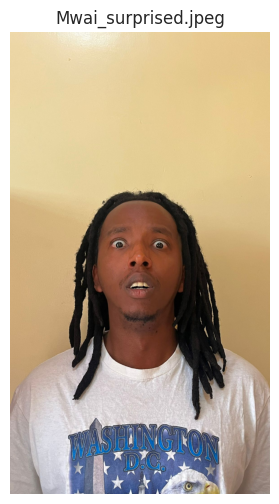

Image: Blessing_smile.jpeg


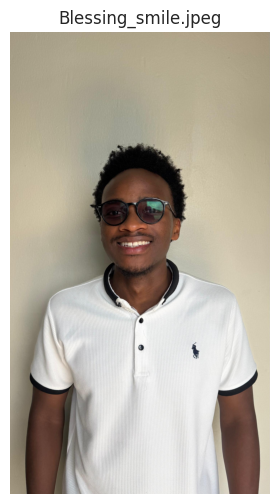

Image: Liliane_surprised.jpeg


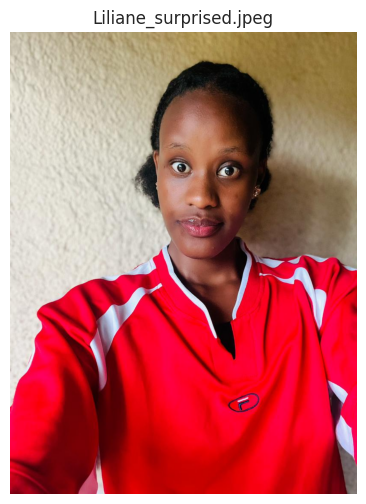

Image: Mwai_neutral.jpeg


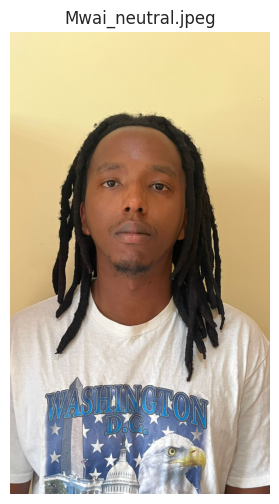

Image: Mwai_smile.jpeg


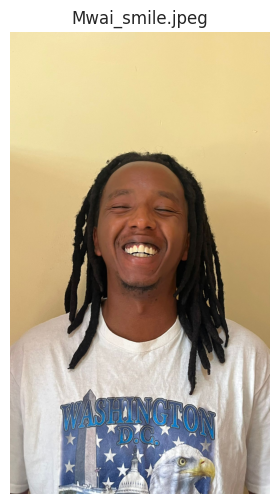

Image: Blessing_neutral.jpeg


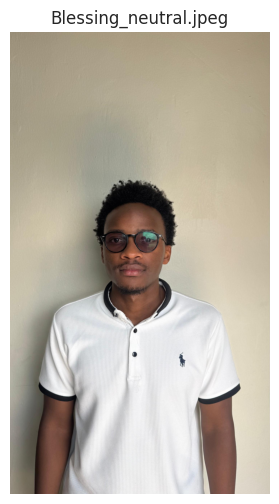

Image: Blessing_surprised.jpeg


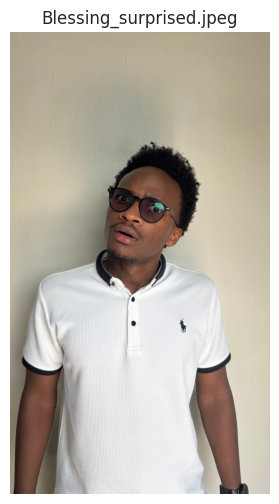

Image: Mitali_neutral.jpeg


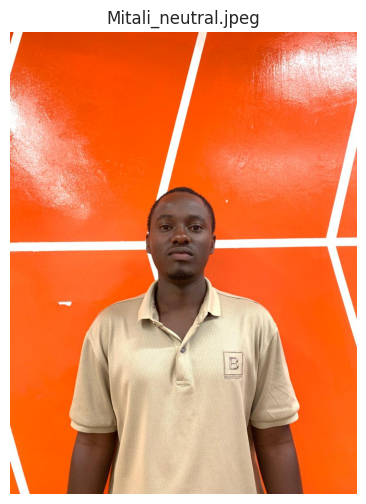

Image: Liliane_smile.jpeg


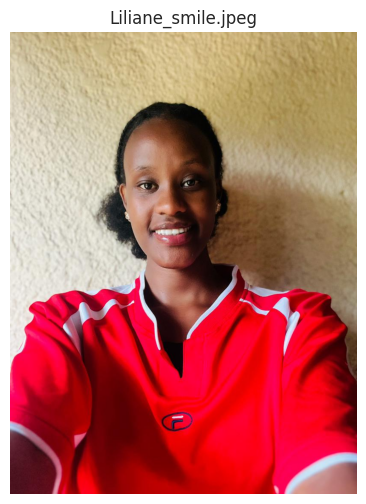

Image: Mitali_smile.jpeg


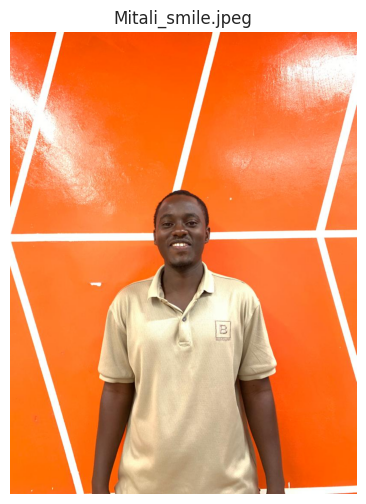

Image: Mitali_surprised.jpeg


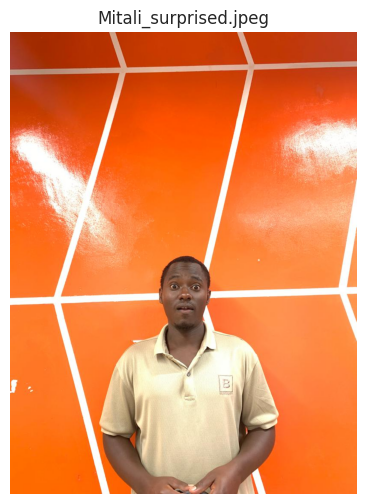

Image: Liliane_neutral.jpeg


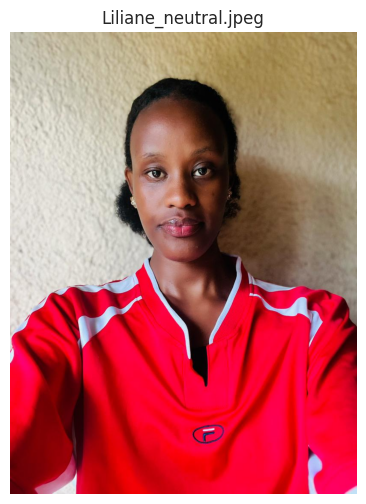

In [232]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Display samples
for member_img_name in members:
    print(f"Image: {member_img_name}")
    image_path = os.path.join(IMAGE_FOLDER, member_img_name)

    img = load_image(image_path)
    plt.imshow(img)
    plt.title(member_img_name)
    plt.axis("off")
    plt.show()

## Augmenting Images

Applying data augmentation techniques to expand the training dataset:

**Augmentation Techniques:**
1. **90° Rotation**: Teaches model orientation invariance (head tilts)
2. **Horizontal Flip**: Creates mirror image (camera flips, different angles)
3. **Grayscale Conversion**: Forces model to focus on structural features, not color

**Benefits:**
- **4x data expansion**: Each original image becomes 4 samples (original + 3 augmentations)
- **Improved generalization**: Model learns identity from fundamental features, not superficial patterns
- **Real-world robustness**: Handles variations in camera angle, lighting, and image processing

This augmentation strategy is crucial given our limited number of original images per person.

In [233]:
def augment_image(img):
    # rotation
    rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    # flip
    flipped = cv2.flip(img, 1)

    # grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    return rotated, flipped, gray

## Using MobileNetV2 to extract Features

Leveraging transfer learning with a pre-trained deep neural network:

**Why MobileNetV2?**
- Pre-trained on ImageNet (1.4 million images, 1000 classes)
- Learned hierarchical features: edges → shapes → objects → complex patterns
- Efficient architecture optimized for mobile deployment
- Global average pooling produces 1280-dimensional feature vector

**Feature Extraction Process:**
1. Resize image to 224x224 (model's expected input)
2. Preprocess using ImageNet normalization
3. Pass through network (without final classification layer)
4. Output: 1280-dimensional embedding capturing facial identity

**Advantage:**
- No need to train CNN from scratch (would require thousands of images)
- Pre-learned features transfer well to face recognition
- Compact representation that's highly discriminative

In [234]:
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array

model = MobileNetV2(weights="imagenet", include_top=False, pooling='avg')

def extract_embedding(img):
    resized = cv2.resize(img, (224, 224))
    # Convert grayscale images to 3 channels by stacking
    if len(resized.shape) == 2:
        resized = np.stack((resized,)*3, axis=-1)
    arr = img_to_array(resized)
    arr = np.expand_dims(arr, axis=0)
    arr = preprocess_input(arr)
    embedding = model.predict(arr)
    return embedding.flatten()

## Extracting and saving all images into csv

Processing all images through the feature extraction pipeline:

**Workflow:**
1. Loop through each image file
2. Extract person's name from filename (e.g., 'Mwai_neutral.jpg' → 'Mwai')
3. Load original image and generate 3 augmented versions
4. Extract 1280-dimensional embedding from each version
5. Store: member name, image filename, augmentation type, and all 1280 features

**Output Structure (image_features.csv):**
- Columns: member, img, aug_type, f0, f1, ..., f1279
- Rows: Each image variant (4 rows per original image)
- Total features: 1280 dimensions per sample

This CSV becomes the training data for the face recognition model.

In [235]:
image_features = []

for member_filename in members:
    # Extract person's name (e.g., 'Mwai') from the filename
    person_name = member_filename.split('_')[0]

    image_path = os.path.join(IMAGE_FOLDER, member_filename)
    img = load_image(image_path)
    rotated, flipped, gray = augment_image(img)

    for version, label in zip([img, rotated, flipped, gray],
                              ["original", "rotated", "flipped", "grayscale"]):

        emb = extract_embedding(version)
        # Use person_name for the 'member' column and member_filename for the 'img' column
        row = [person_name, member_filename, label] + emb.tolist()
        image_features.append(row)

# convert to DF
cols = ["member", "img", "aug_type"] + [f"f{i}" for i in range(len(image_features[0]) - 3)]
image_df = pd.DataFrame(image_features, columns=cols)

# save
image_df.to_csv("image_features.csv", index=False)
image_df.head()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━

member                  img   aug_type        f0        f1        f2  \
0      Mwai  Mwai_surprised.jpeg   original  0.000000  0.559404  0.070738   
1      Mwai  Mwai_surprised.jpeg    rotated  0.731860  0.371484  0.074999   
2      Mwai  Mwai_surprised.jpeg    flipped  0.012750  0.842781  0.116309   
3      Mwai  Mwai_surprised.jpeg  grayscale  0.415998  1.500616  0.126328   
4  Blessing  Blessing_smile.jpeg   original  0.023011  0.083709  0.000371   

         f3        f4        f5        f6        f7        f8        f9  \
0  0.352310  0.130884  1.183560  0.000000  1.549163  0.655051  0.000000   
1  2.379741  1.169223  0.980075  0.250899  1.961747  0.089950  0.024115   
2  0.558861  0.145483  0.819912  0.047586  1.574844  0.671321  0.000000   
3  0.319494  0.542288  2.185413  0.078988  0.089009  0.278141  0.096179   
4  0.361977  0.408091  0.020130  1.332223  0.871874  0.000000  0.582351   

        f10       f11       f12       f13       f14       f15       f16  \
0  1.360518  0.118802  0.098193  0.000000  0.018505  0.102043  0.007009   
1  1.017644  0.004861  0.005966  1.834652  0.205263  0.000000  0.000000   
2  0.863316  0.100103  0.114884  0.027115  0.131315  0.259863  0.000000   
3  0.162508  0.000000  0.000000  0.000000  0.033110  0.015286  0.032510   
4  0.693810  1.098993  0.078577  0.189560  0.818209  0.100915  0.000000   

        f17       f18       f19       f20       f21       f22       f23  \
0  0.022656  1.456604  0.139581  0.973650  0.140277  1.131914  0.158151   
1  2.189031  0.025061  1.441460  0.433514  0.123021  0.644740  1.933753   
2  0.013431  0.377580  0.252038  0.926741  0.044678  0.197573  0.222368   
3  0.007667  0.341590  0.035397  0.591780  0.063995  0.534435  0.337524   
4  0.028478  0.361710  0.083684  0.000000  0.044598  0.898970  0.087775   

        f24       f25       f26       f27       f28       f29       f30  \
0  0.333418  0.000000  0.338218  0.115842  1.865750  0.035154  0.000000   
1  0.159690  0.000000  1.705965  0.248618  0.048732  0.830708  0.000000   
2  0.292166  0.000000  0.019372  0.074527  2.226148  0.048144  0.285297   
3  0.212210  0.000000  0.113613  0.110383  1.700697  0.174903  0.004694   
4  0.031851  0.505331  0.044601  0.000000  0.393386  0.000000  0.136771   

        f31       f32       f33       f34       f35       f36       f37  \
0  0.000000  0.205715  0.110122  0.381704  0.939671  0.297663  0.254566   
1  0.374093  0.831916  0.739117  0.096560  0.077408  0.777675  1.336606   
2  0.042930  0.198558  0.175660  0.145637  1.181664  0.357198  0.396285   
3  0.731258  1.194031  0.249553  0.956244  1.169480  0.303701  0.404798   
4  0.000000  1.665474  0.678675  1.352815  2.564723  0.000000  0.024122   

        f38       f39       f40       f41       f42       f43       f44  \
0  0.142326  0.012562  0.000000  0.010974  0.025826  0.023727  0.808317   
1  0.000000  0.064382  0.000000  0.036476  1.453940  0.557072  0.000000   
2  0.206799  0.005900  0.000000  0.120887  0.005907  0.196845  0.500463   
3  0.076065  0.024536  0.000000  0.068446  0.211077  0.652374  0.812961   
4  0.497064  0.039327  0.005812  1.105075  0.000000  0.256703  1.136879   

        f45       f46       f47       f48       f49       f50       f51  \
0  0.193945  0.026284  1.411680  0.168508  0.278623  0.000000  1.613154   
1  0.084777  0.528339  1.159759  0.877049  0.793302  0.000000  0.438796   
2  0.121282  0.000000  1.148245  0.264138  0.245941  0.014007  1.881045   
3  0.068907  0.449946  0.415356  1.049561  0.025777  0.000000  1.426470   
4  0.083755  0.000000  0.403998  0.904563  0.931727  0.000000  0.503214   

       f52       f53       f54       f55       f56       f57       f58  \
0  0.00000  1.888272  0.000000  0.000000  0.457319  0.175656  0.000000   
1  0.49644  0.799970  0.562281  0.024809  0.018543  0.119102  0.191135   
2  0.00000  0.920068  0.000000  0.000000  0.395685  0.056137  0.020805   
3  0.00000  1.442784  0.059079  0.033848  0.378974  1.259550  0.027200   
4  0.00000  1.2

## Audio Section

## Importing Libraries

In [236]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading Data

Defining paths to voice recordings from each team member:

**Recording Structure:**
- Each member records 2 phrases:
  - "Yes, approve" (approval command)
  - "Confirm transaction" (confirmation command)
- Total: 8 audio samples (4 members × 2 phrases)

**Why Two Phrases?**
- Captures voice characteristics across different words
- Tests consistency of speaker identity regardless of content
- More robust voice profile than single-phrase training

File naming convention: MemberName_phrase.wav (e.g., Mwai_approve.wav)

In [237]:
audio_paths = {
    "Mwai_approve" : "/content/audios/mwai_approve.wav",
    "Mitali_approve" : "/content/audios/Mitali_approve.wav",
    "Liliane_approve" : "/content/audios/Liliane_approve.wav",
    "Blessing_approve" : "/content/audios/Blessing_approve.wav",
    "Mwai_confirm" : "/content/audios/mwai_confirm.wav",
    "Mitali_confirm" : "/content/audios/Mitali_confirm.wav",
    "Liliane_confirm" : "/content/audios/Liliane_confirm.wav",
    "Blessing_confirm" : "/content/audios/Blessing_confirm.wav"
}

## Visualization Functions

Creating functions to visualize audio signals:

**Waveform Plot:**
- Shows amplitude (loudness) over time
- Reveals speaking rhythm and intensity patterns
- Visual representation of the raw audio signal

**Mel Spectrogram:**
- Displays frequency content over time
- Colors indicate energy at each frequency (dB scale)
- Mel scale approximates human hearing perception
- Shows formants, pitch variations, and spectral patterns

These visualizations help understand unique voice characteristics of each speaker.

In [238]:
def plot_waveform(y, sr, title):
  plt.figure(figsize=(10, 3))
  librosa.display.waveshow(y, sr=sr)
  plt.title(f"Waveform - {title}")
  plt.tight_layout
  plt.show()

In [239]:
def plot_spectrogram(y, sr, title):
  from librosa.feature import melspectrogram as _melspectrogram_func
  S = _melspectrogram_func(y=y, sr=sr, n_mels=128)
  S_dB = librosa.power_to_db(S, ref=np.max)

  plt.figure(figsize=(10, 4))
  librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.tight_layout()
  plt.show()

## Augmentations

Applying audio augmentation to simulate real-world variations:

**Techniques:**
1. **Pitch Shift (+2 semitones)**: Raises voice pitch
   - Simulates: emotional variation, stress, excitement
   
2. **Time Stretch (1.2x faster)**: Increases speaking speed
   - Simulates: hurried speech, different speaking rates
   
3. **Noise Addition**: Adds random background noise
   - Simulates: noisy environments, microphone quality

**Purpose:**
- Model learns speaker identity despite variations
- Increases training data (4x: original + 3 augmentations)
- Improves robustness to recording conditions

In [240]:
def augment_audio(y, sr):
  aug1 = librosa.effects.pitch_shift(y=y, sr=sr, n_steps=2)
  aug2 = librosa.effects.time_stretch(y, rate = 1.2)
  aug3 = y + 0.005 * np.random.randn(len(y))
  return{"pitch_shift":aug1, "time_stretch":aug2, "noise":aug3}

## Feature Extraction

Extracting acoustic features that characterize speaker identity:

**MFCCs (13 coefficients):**
- Mel-Frequency Cepstral Coefficients
- Represent vocal tract shape (unique to each person)
- Capture formant frequencies (vowel sounds)
- Gold standard in speaker recognition

**Spectral Rolloff:**
- Frequency below which 85% of energy is concentrated
- Indicates voice brightness/warmth
- Higher = brighter voice, Lower = deeper voice

**Energy:**
- Total signal power (sum of squared amplitudes)
- Captures speaking intensity and volume patterns
- Unique to individual speaking style

**Total: 15 features** (13 MFCCs + rolloff + energy) create a voice fingerprint.

In [241]:
def extract_features(y, sr, label):
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
  rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
  energy = np.sum(y**2)

  feature_dict = {"label": label, "rolloff": rolloff, "energy": energy}
  for i in range(13):
    feature_dict[f"mfcc_{i}"] = mfcc[i]

  return feature_dict

## Audio + Augmentations

Processing all audio samples through the complete pipeline:

**For Each Recording:**
1. Load audio file at 22050 Hz sample rate
2. Visualize waveform and spectrogram (original)
3. Extract features (original)
4. Apply each augmentation:
   - Visualize augmented version
   - Extract features from augmented version
5. Store all features in list

**Output:**
- Visual comparison of original vs. augmented audio
- Feature vectors for each variant
- 32 total samples (8 recordings × 4 variants)

This comprehensive processing ensures robust voice recognition training.

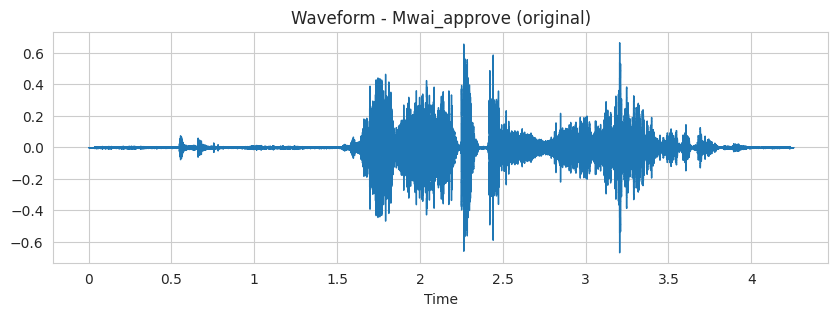

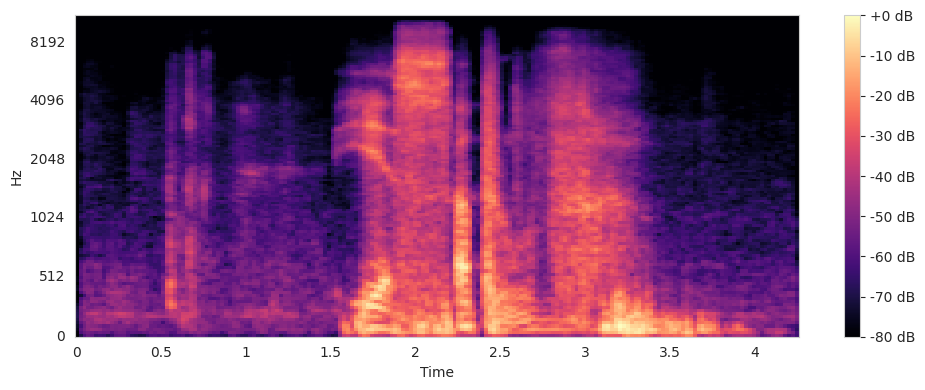

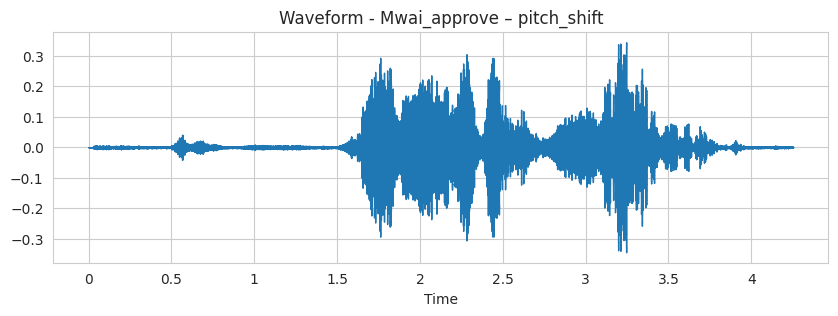

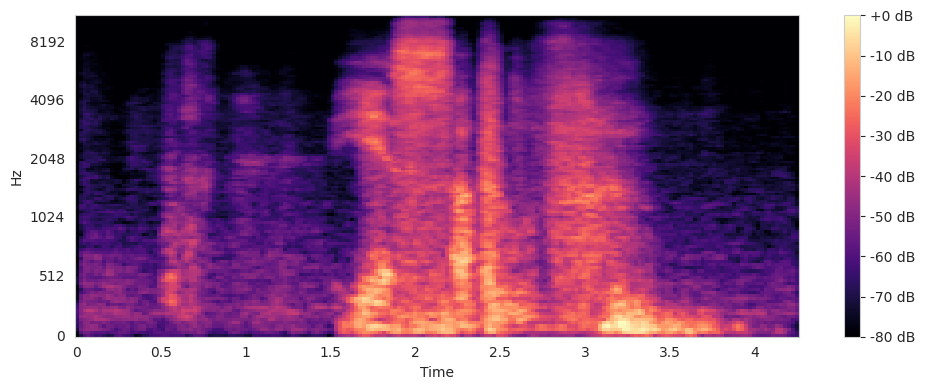

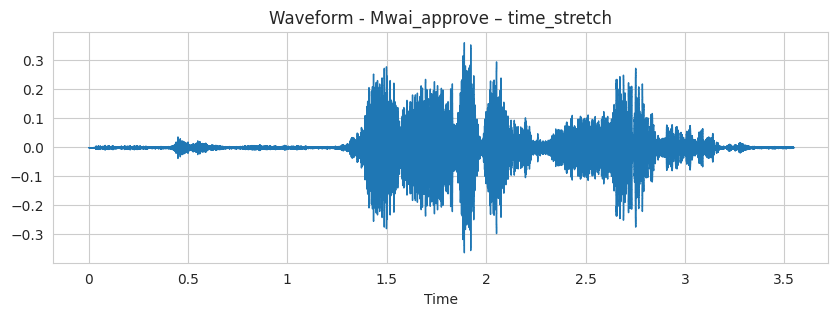

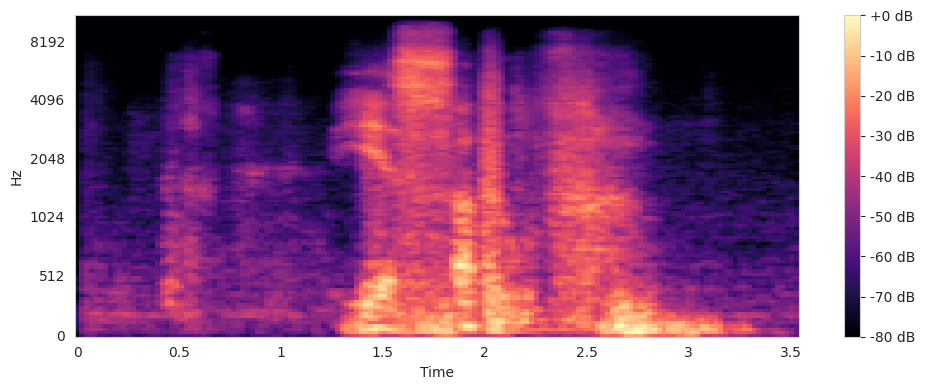

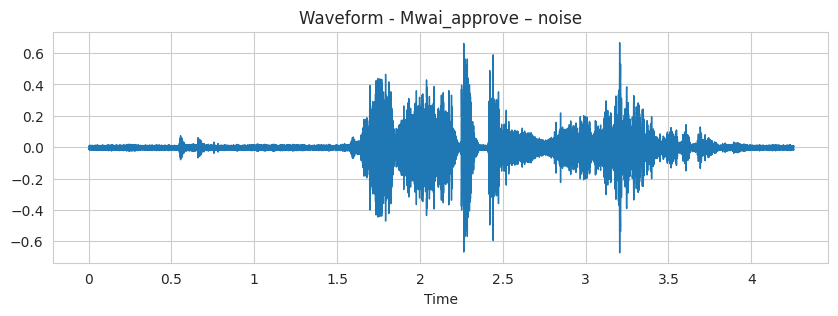

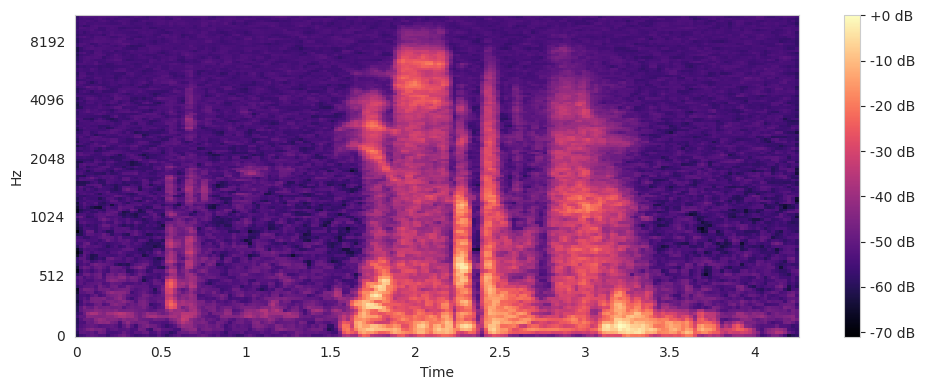

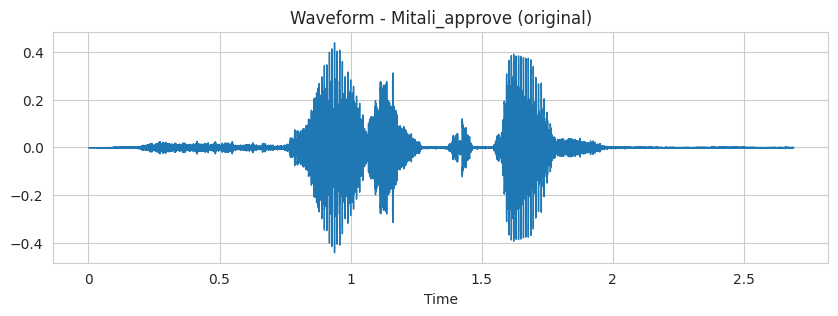

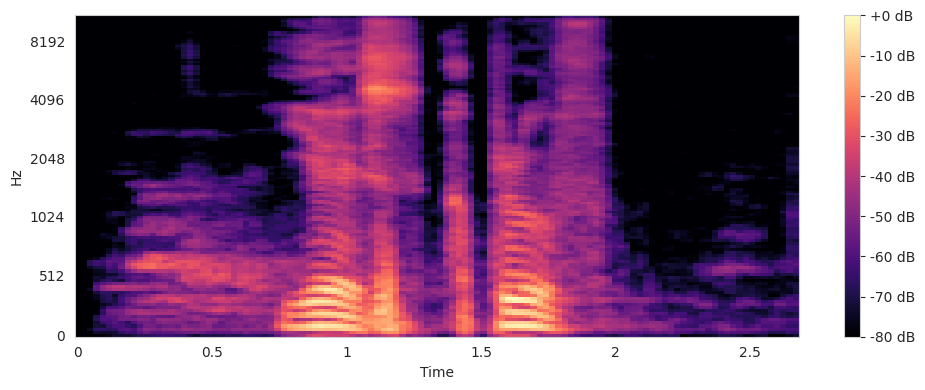

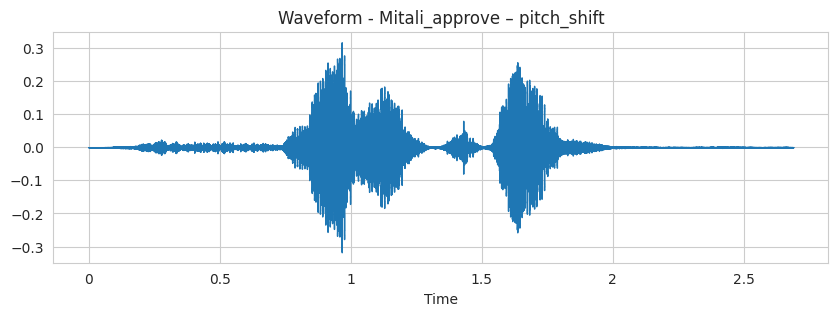

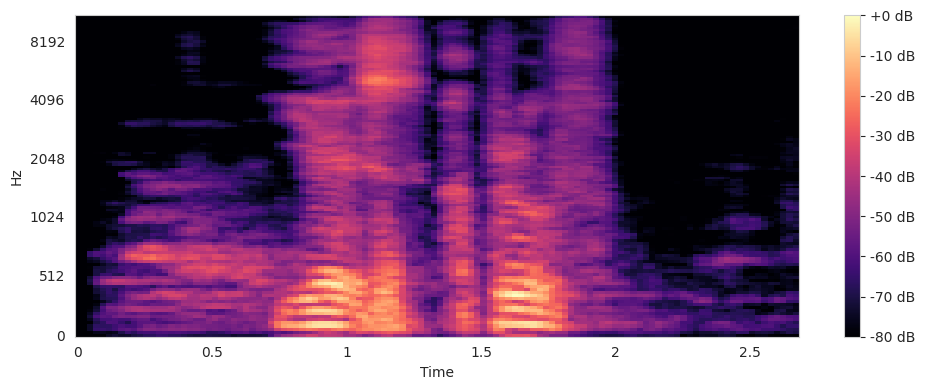

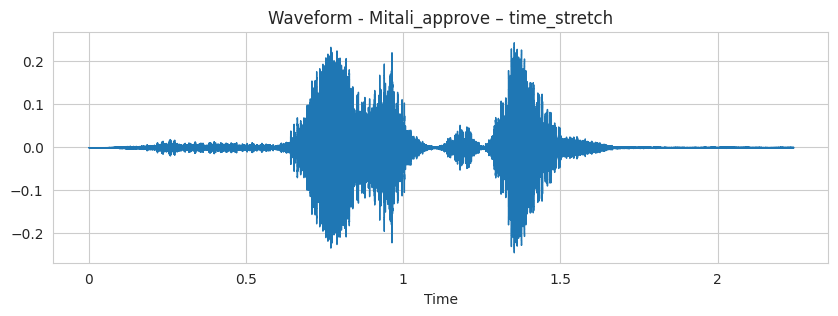

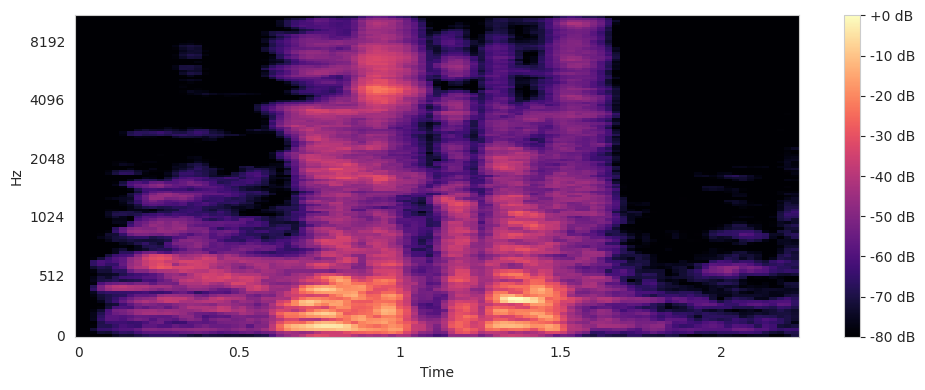

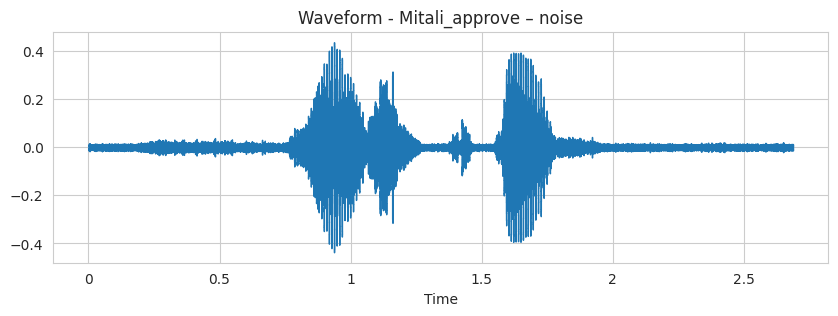

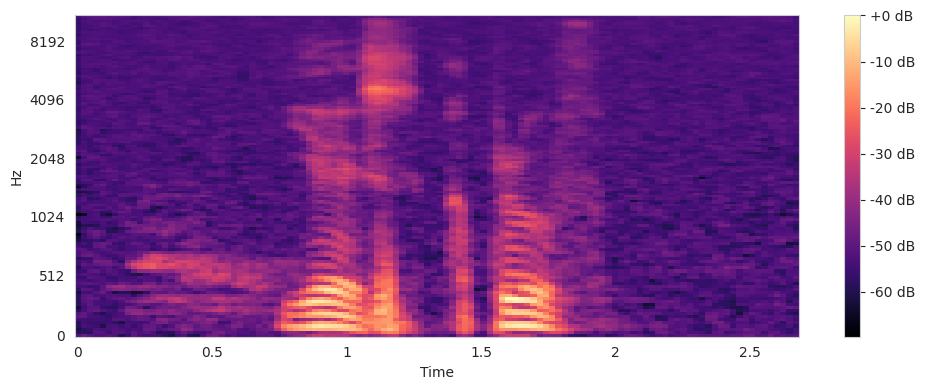

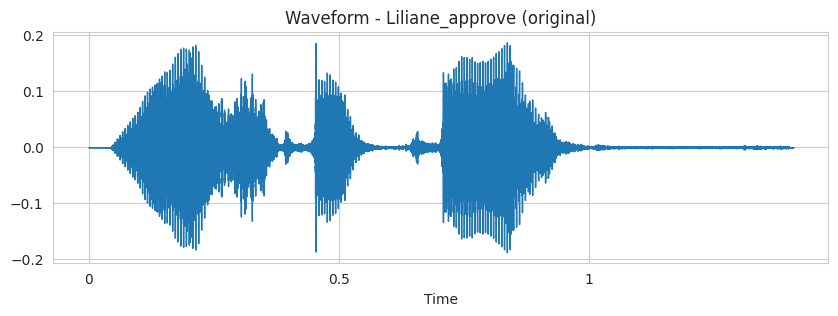

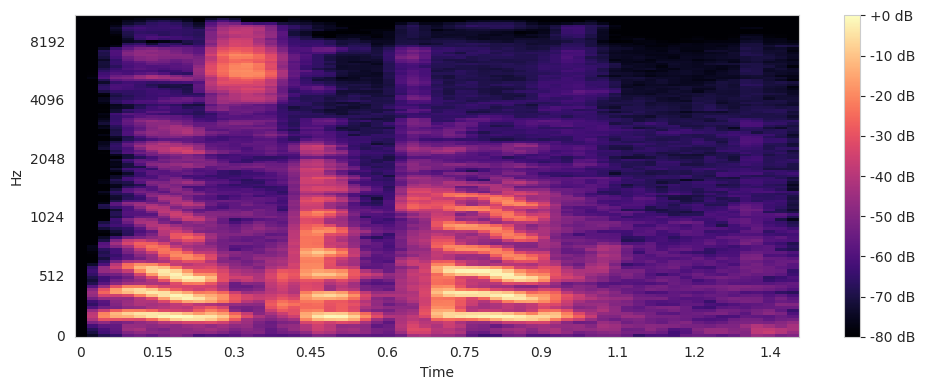

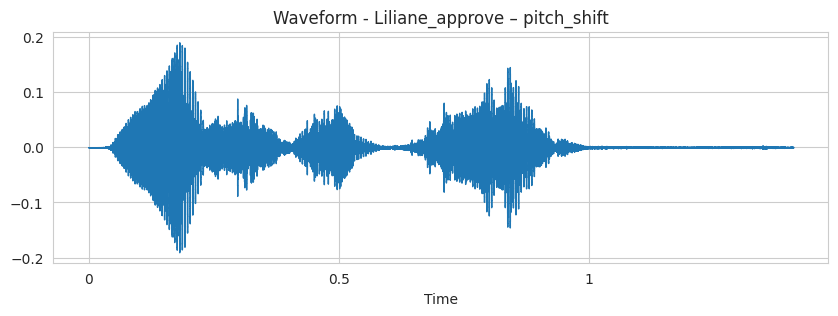

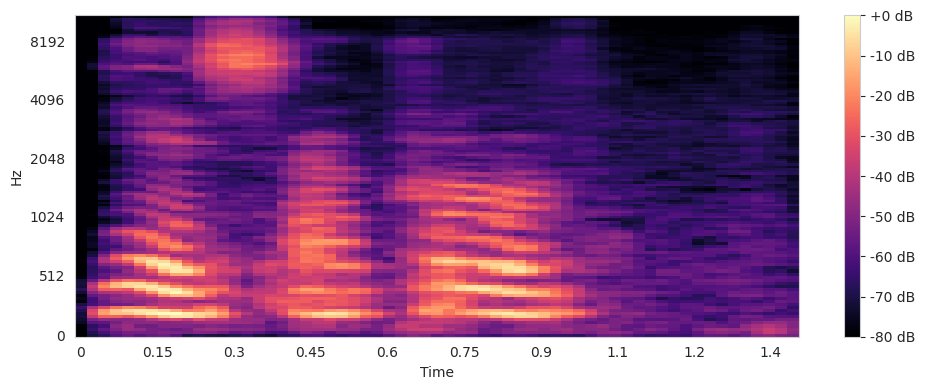

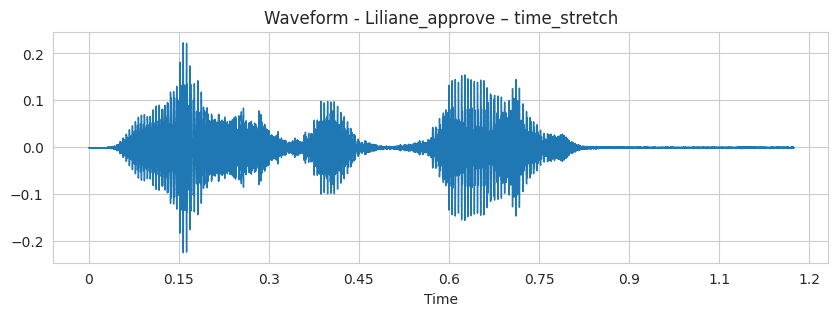

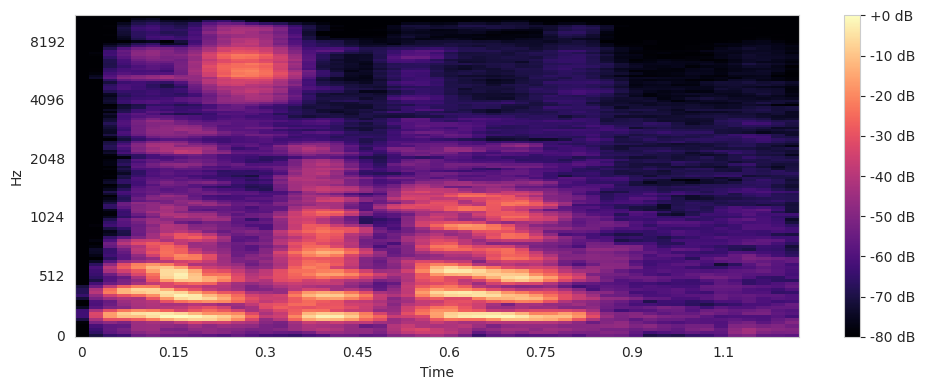

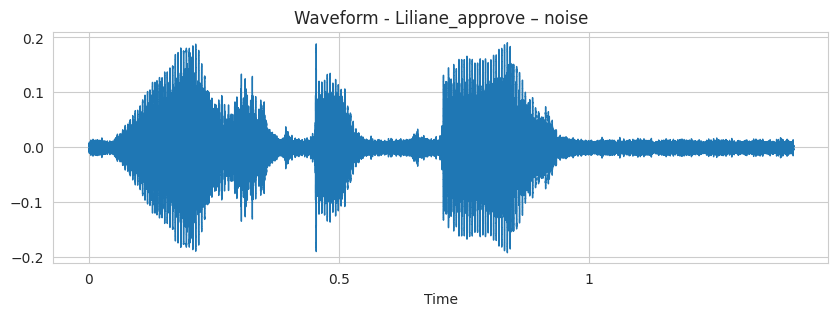

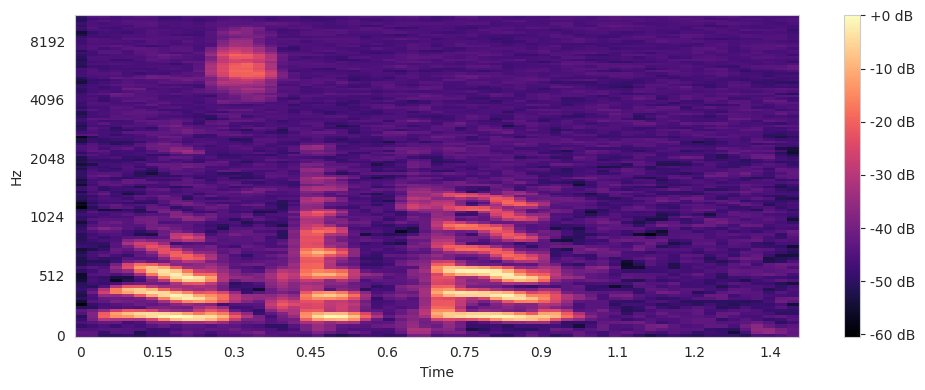

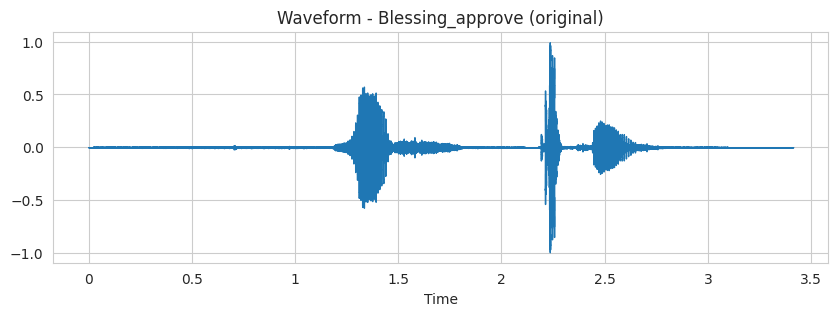

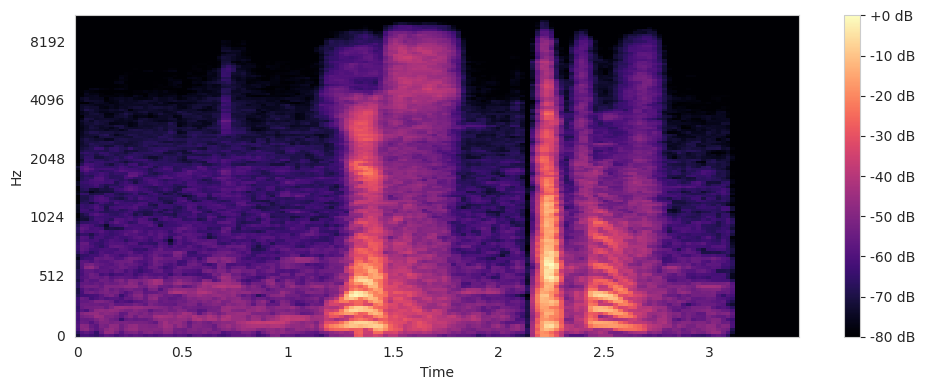

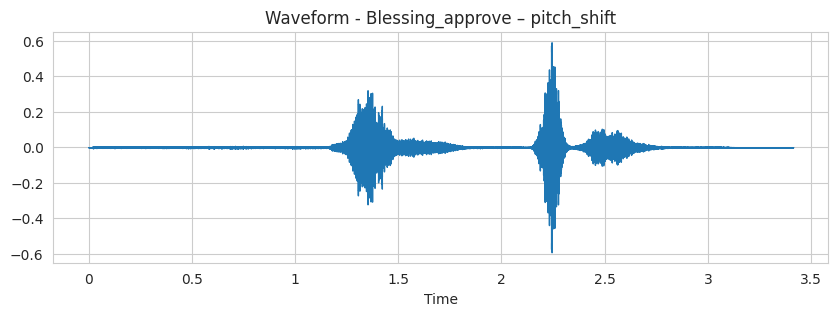

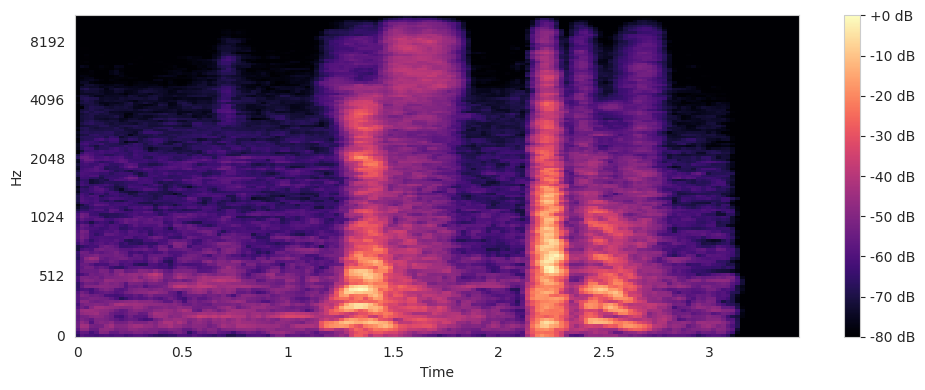

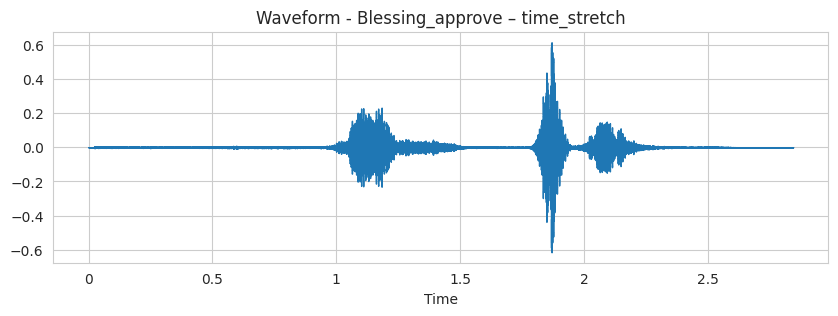

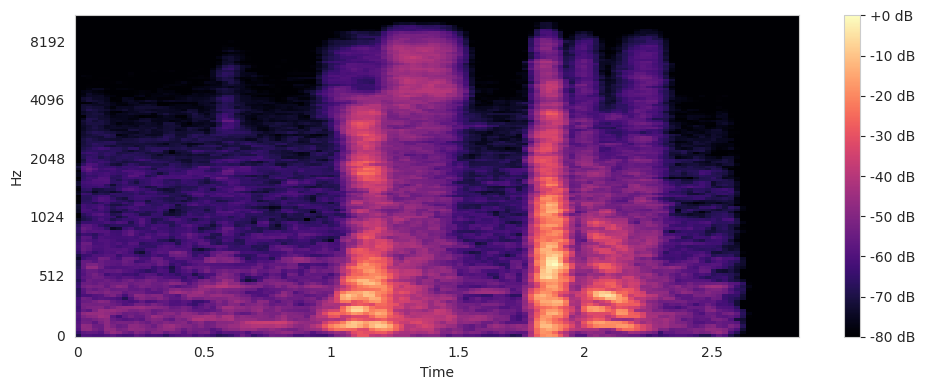

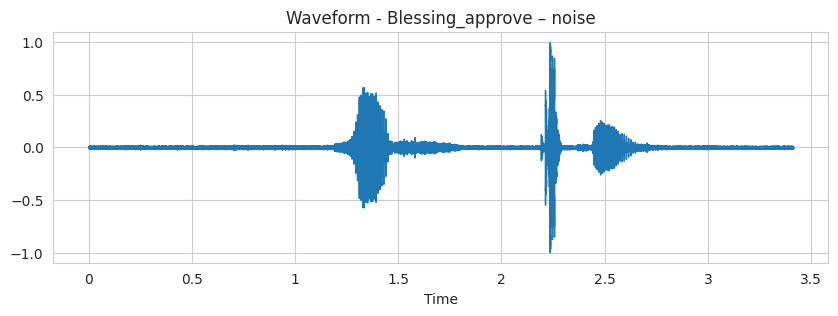

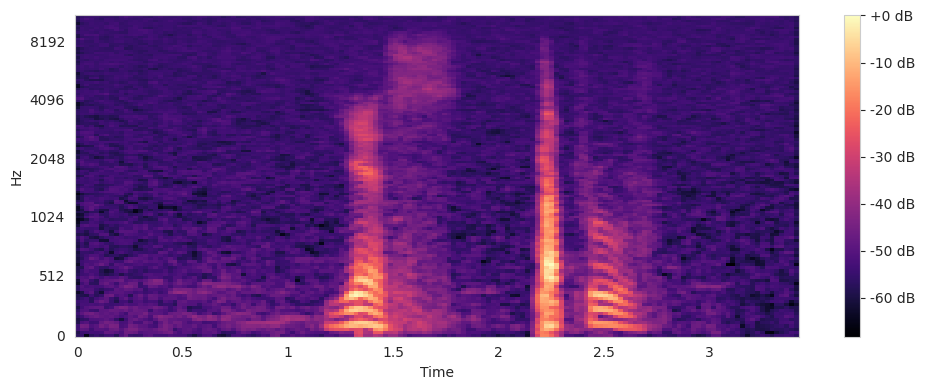

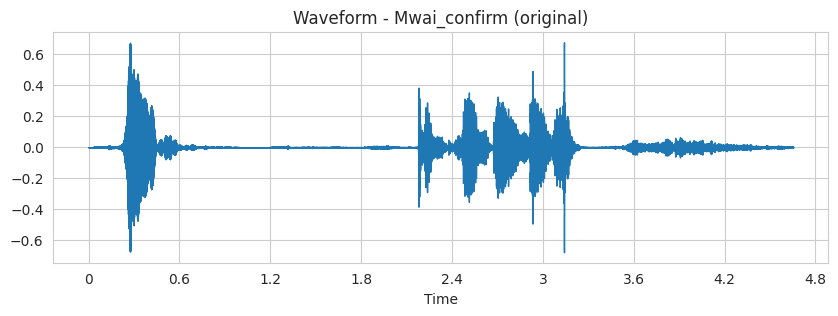

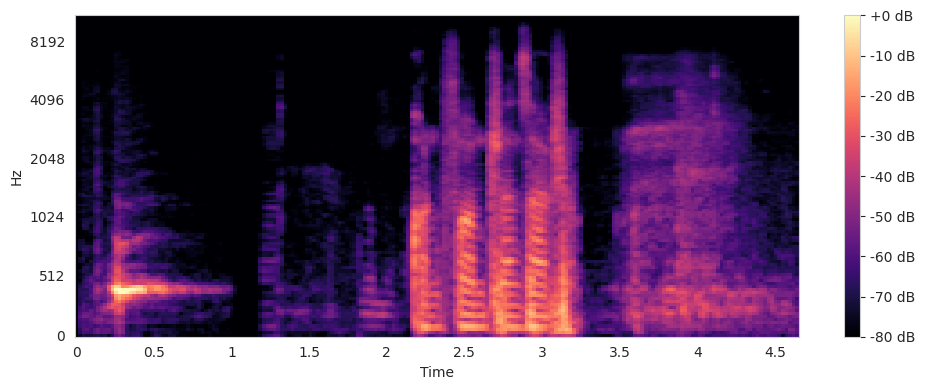

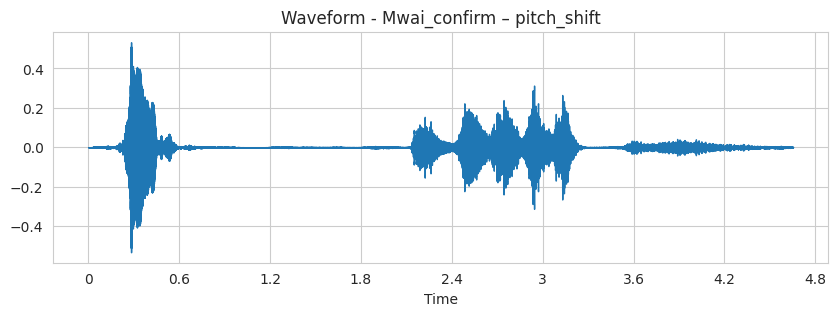

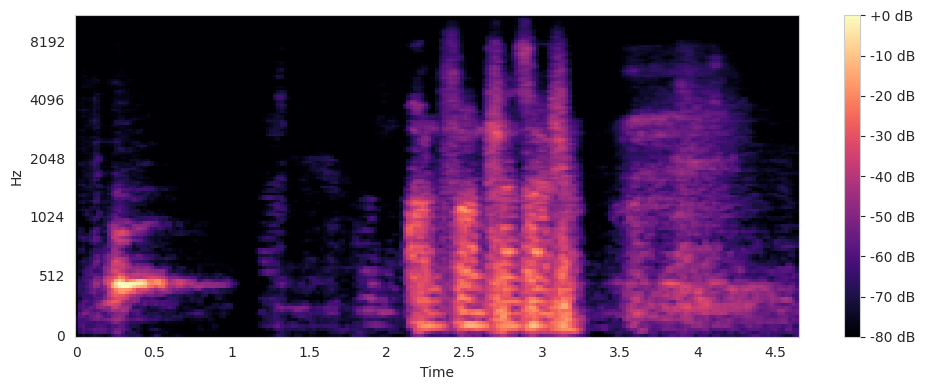

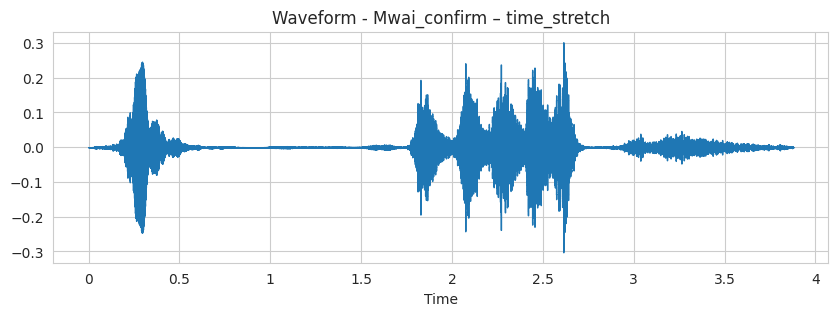

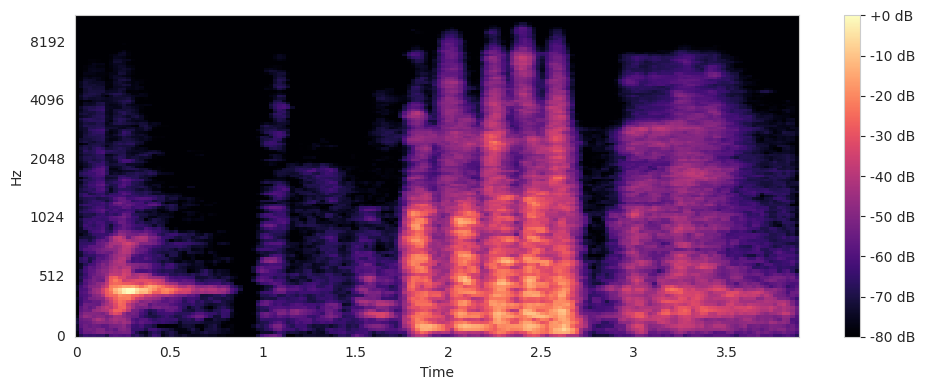

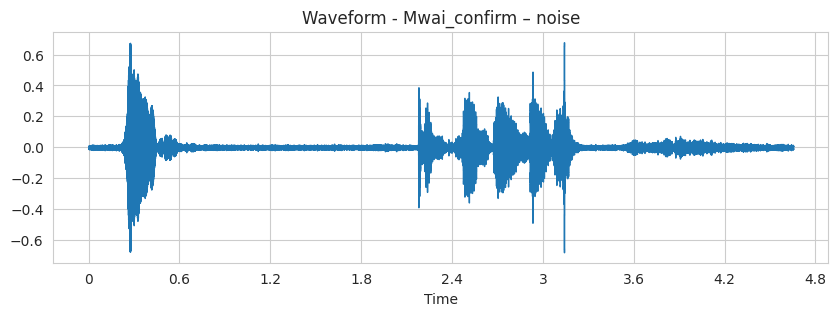

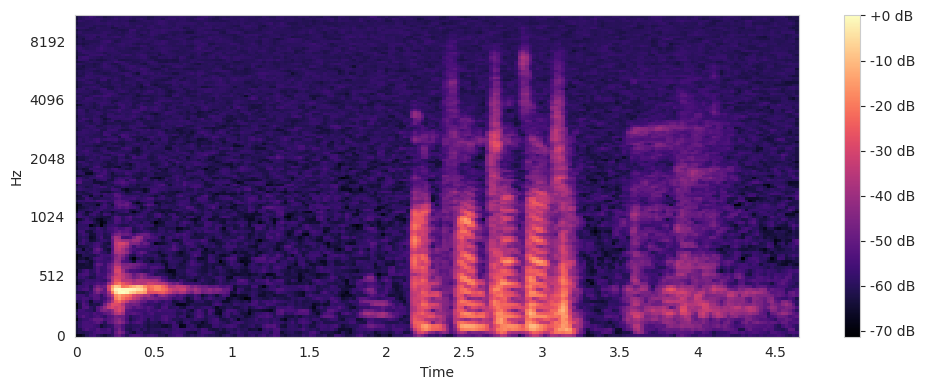

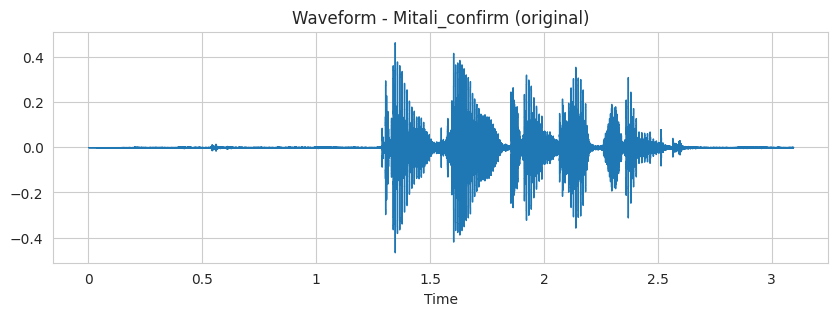

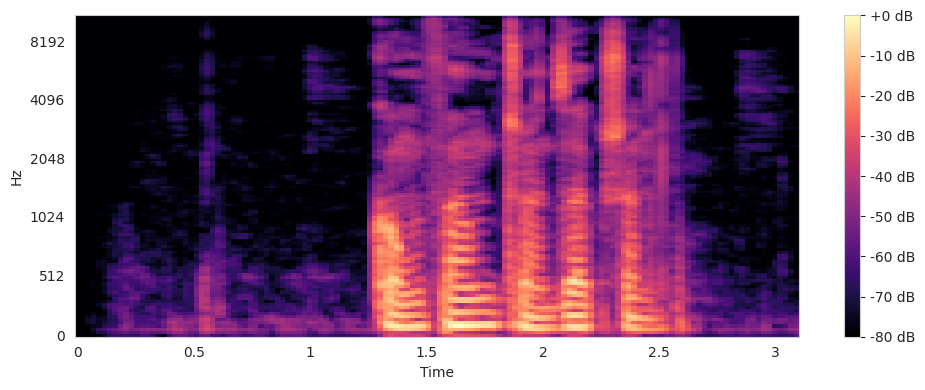

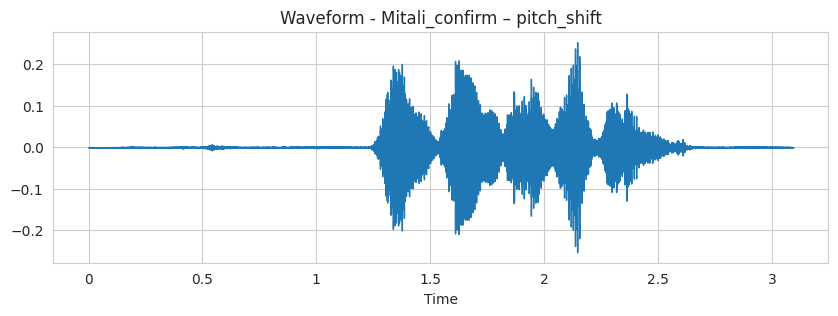

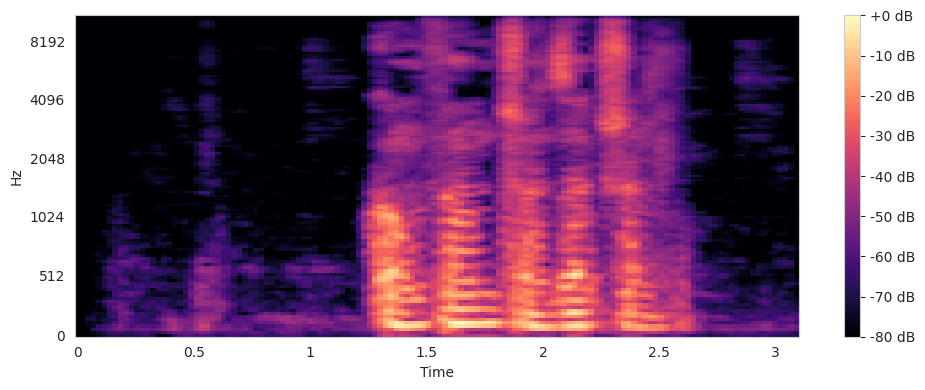

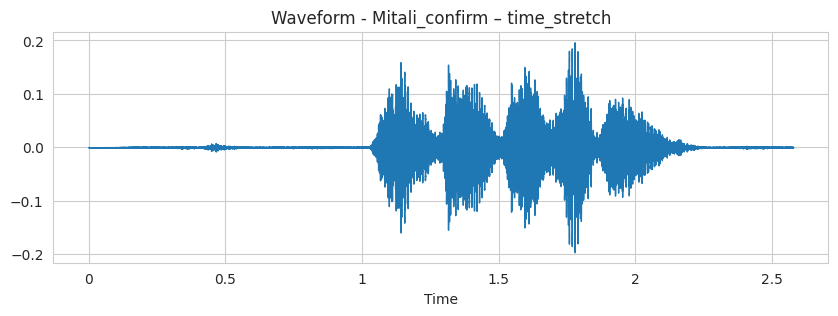

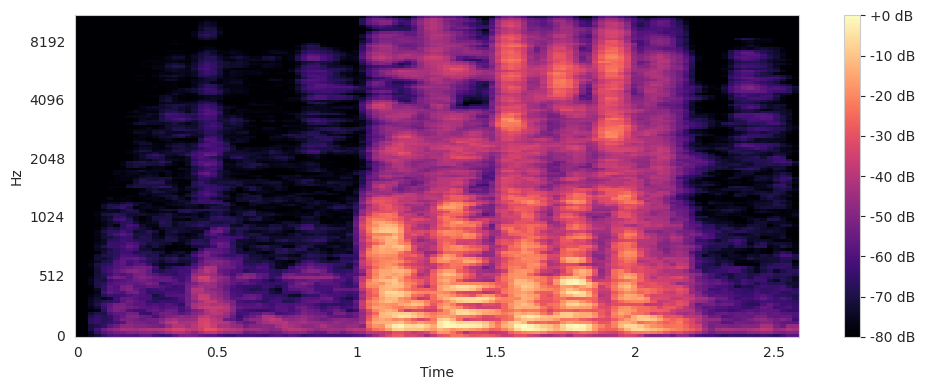

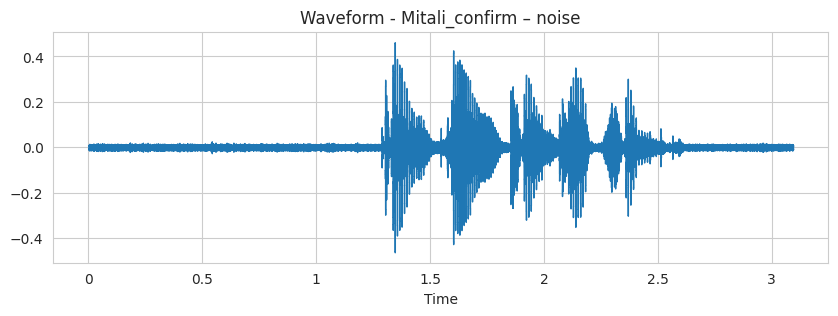

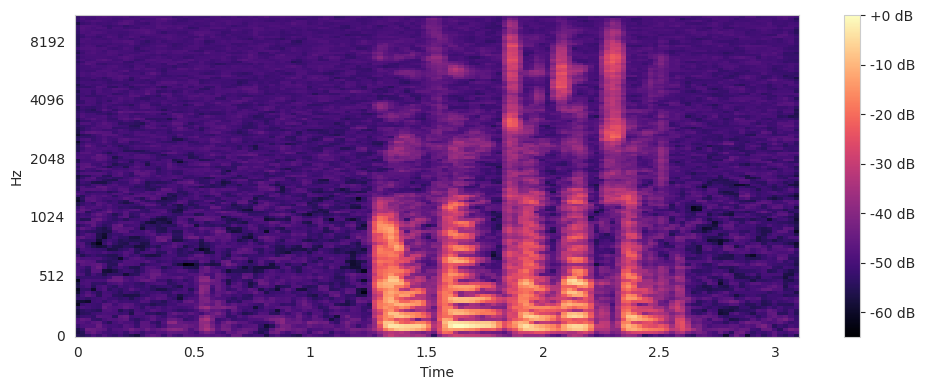

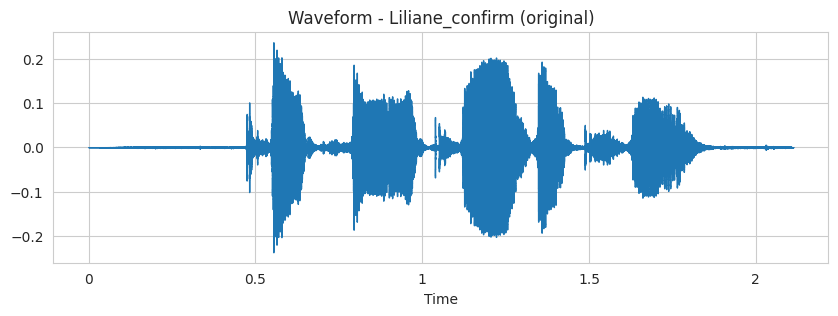

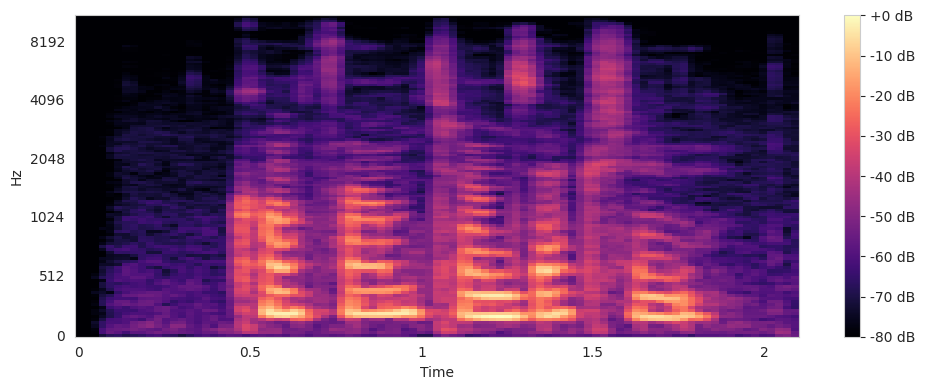

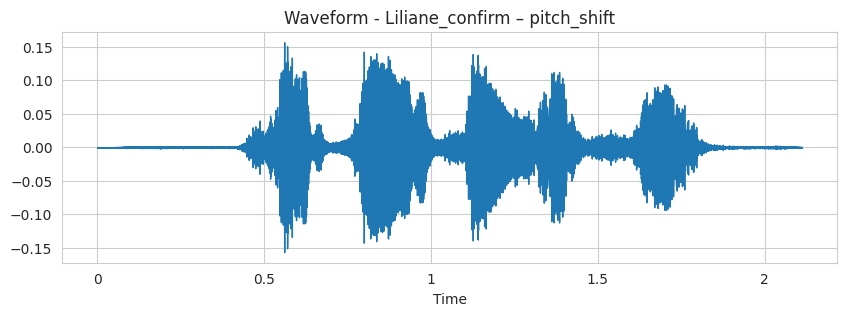

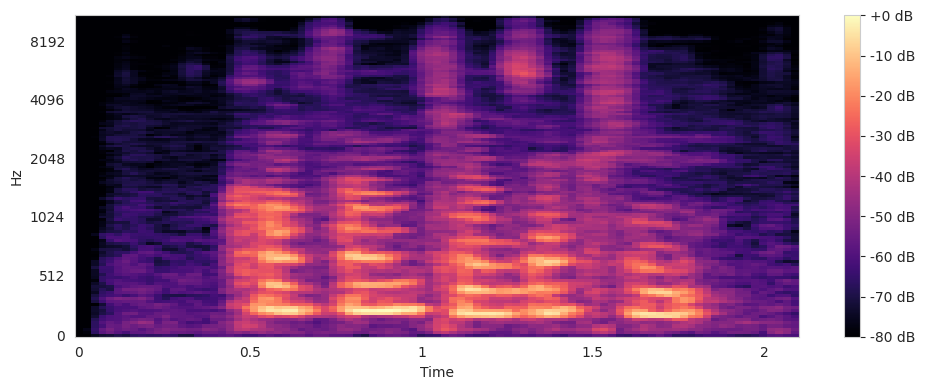

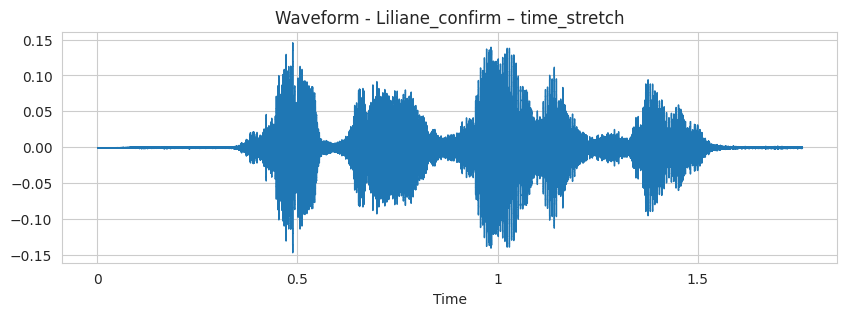

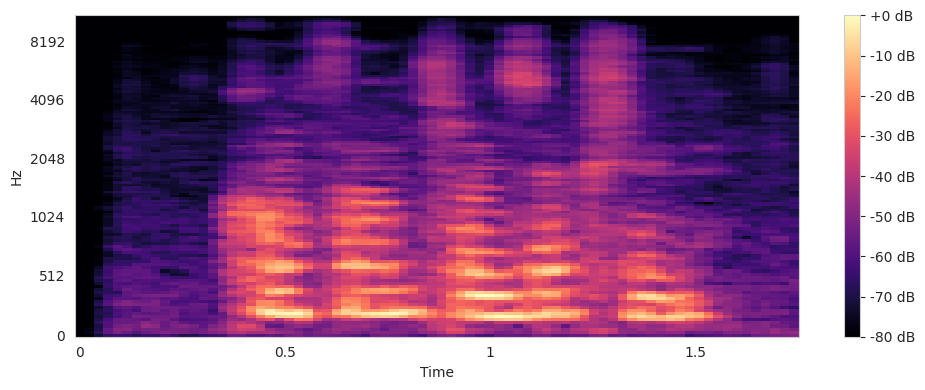

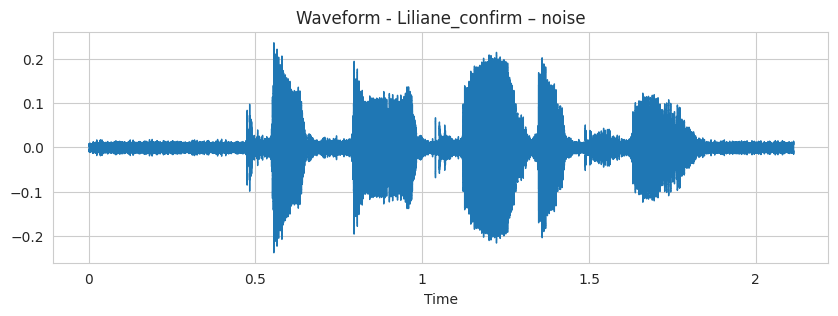

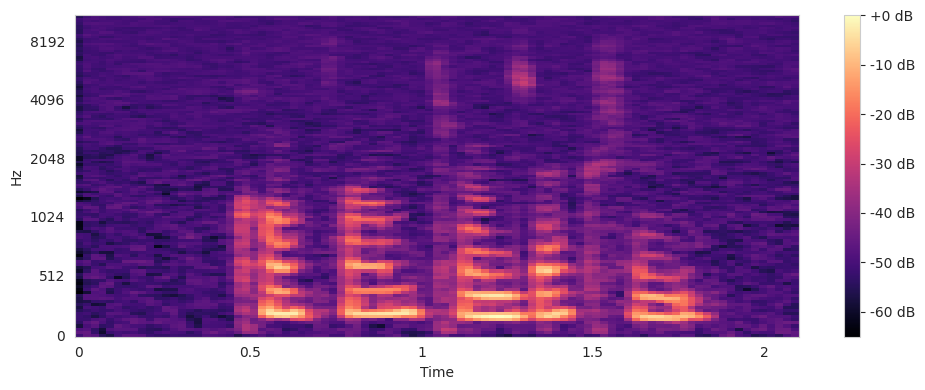

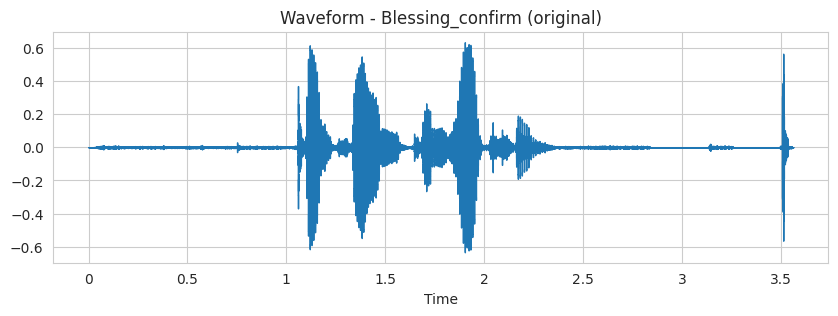

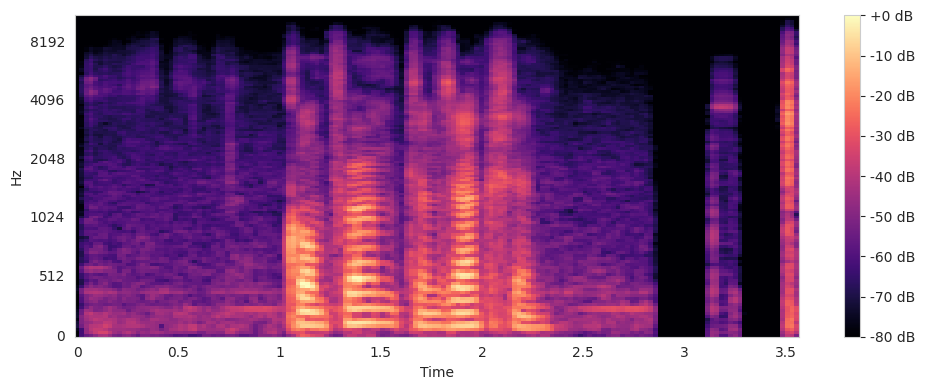

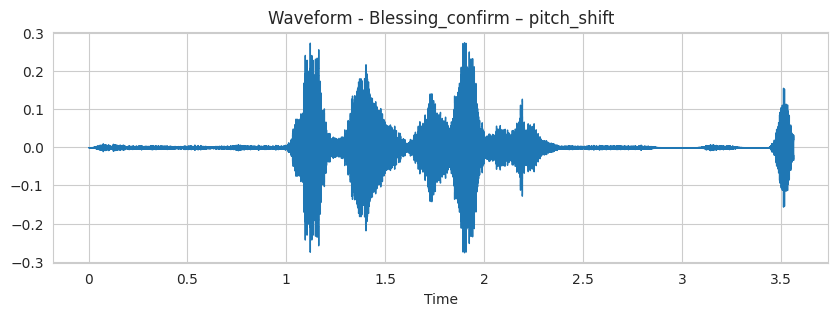

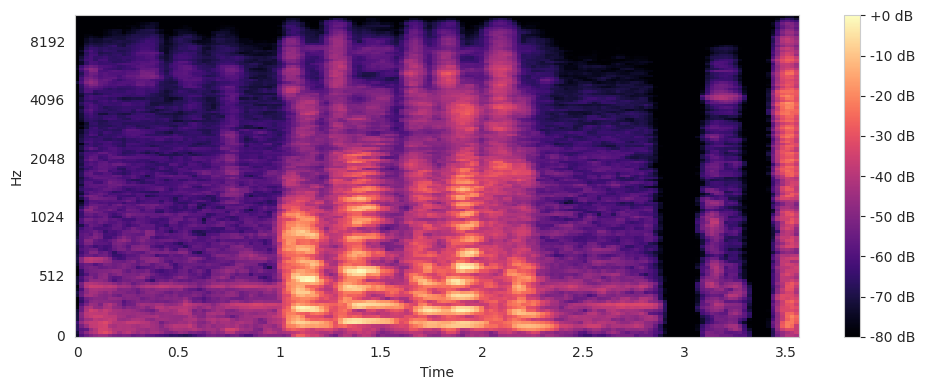

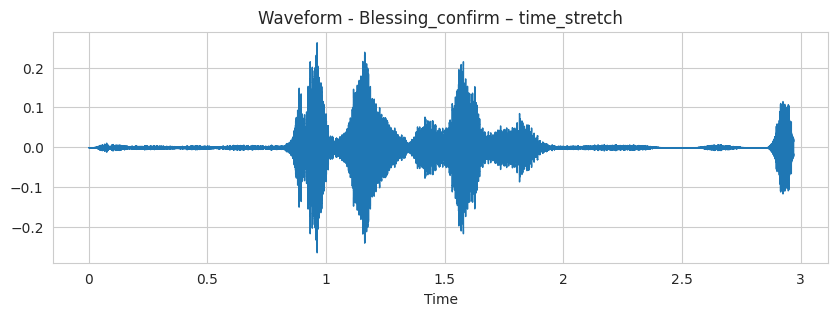

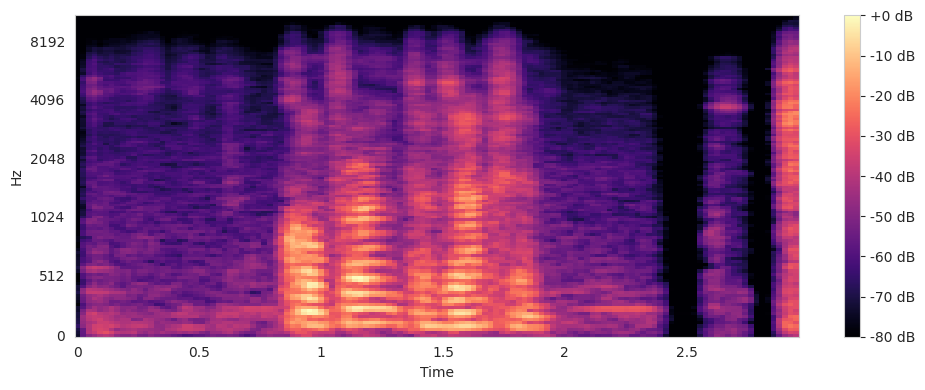

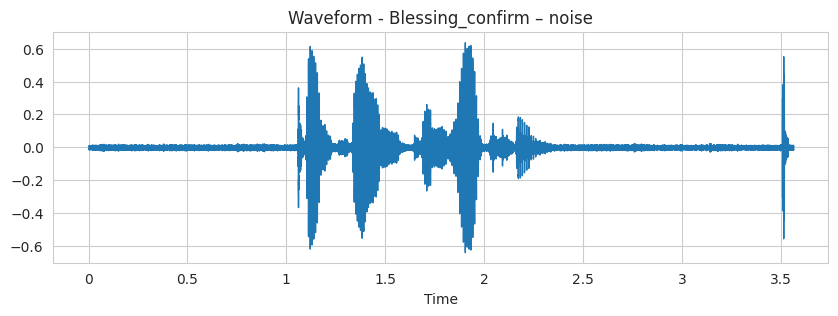

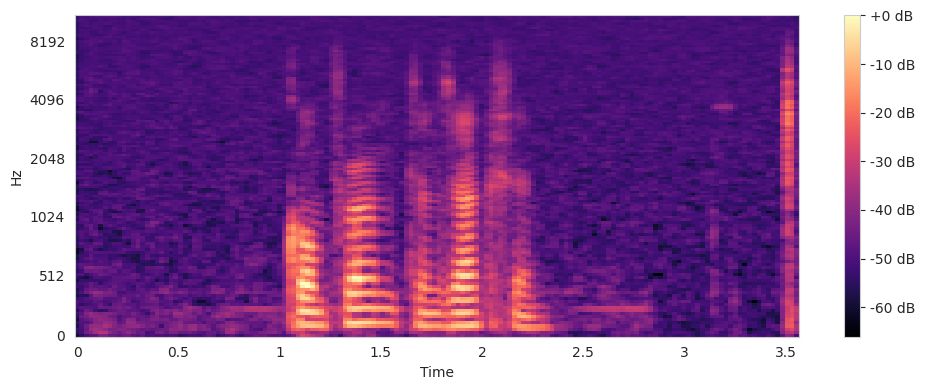

In [242]:
all_features = []

for label, path in audio_paths.items():
    y, sr = librosa.load(path, sr=22050)

    # Visualize original
    plot_waveform(y, sr, f"{label} (original)")
    plot_spectrogram(y, sr, f"{label} (original)")

    # Extract original features
    all_features.append(extract_features(y, sr, f"{label}_original"))

    # Augment audio
    augmented = augment_audio(y, sr)

    for aug_name, aug_audio in augmented.items():
        plot_waveform(aug_audio, sr, f"{label} – {aug_name}")
        plot_spectrogram(aug_audio, sr, f"{label} – {aug_name}")

        all_features.append(
            extract_features(aug_audio, sr, f"{label}_{aug_name}")
        )

## Saving Audios

In [243]:
df = pd.DataFrame(all_features)
df.to_csv("audio_features.csv", index=False)

print("Saved: audio_features.csv")
df.head()

Saved: audio_features.csv


label      rolloff      energy      mfcc_0      mfcc_1  \
0      Mwai_approve_original  2837.292082  436.744324 -341.954559  117.790955   
1   Mwai_approve_pitch_shift  3235.129713  213.073532 -363.300201  109.206009   
2  Mwai_approve_time_stretch  2894.315832  161.384064 -373.630524  120.109299   
3         Mwai_approve_noise  7165.875510  438.905839 -234.676452   47.758043   
4    Mitali_approve_original  4063.371119  169.556747 -415.753113   86.803391   

      mfcc_2     mfcc_3    mfcc_4     mfcc_5    mfcc_6    mfcc_7     mfcc_8  \
0   0.224619  40.040741  2.650119  11.674496  3.070583  5.492224  -5.267673   
1   4.375546  36.289093 -0.983137  10.650209  0.292621  0.549357  -5.615311   
2  -2.738952  43.405792  1.101823  13.087620  2.501979  4.720119  -6.255250   
3  13.057878  22.330198  8.438061   8.831641  6.217041  3.152000  -0.786080   
4  32.896584  19.432859  2.040284   3.709836 -6.634187 -4.547128 -10.213208   

     mfcc_9   mfcc_10   mfcc_11   mfcc_12  
0  2.316550  0.475069  0.011621 -1.154395  
1  4.522574 -2.650427 -0.524173 -3.261542  
2  2.693808 -0.180439  0.020150 -1.154407  
3  0.558657  1.803609  1.306900 -0.649248  
4  4.719667 -2.671334 -4.458248  0.237115

## Model Section

Setting up the machine learning environment for three predictive models:

**Models to Build:**
1. **Face Recognition**: Identify users from facial embeddings
2. **Voice Verification**: Authenticate speakers from voice features
3. **Product Recommendation**: Predict preferred products from multimodal features

**Libraries:**
- RandomForestClassifier: Ensemble learning for robust predictions
- train_test_split: Divide data for training and evaluation
- Accuracy, F1-score, Log Loss: Model performance metrics
- Joblib: Save trained models for deployment

We'll load all preprocessed datasets (merged_features.csv, image_features.csv, audio_features.csv) for model training.

In [244]:
## Importing Libraries
import pandas as pd, numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import joblib
import os

In [245]:
## Loading the merged dataset
merged = pd.read_csv("/content/merged_features.csv")
img_feats = pd.read_csv("/content/image_features.csv")
aud_feats = pd.read_csv("/content/audio_features.csv")

## Face Recognition Model

Building a classifier to identify team members from facial features:

**Data Preparation:**
- Features (X): 1280-dimensional MobileNetV2 embeddings
- Labels (y): Member names (Blessing, Liliane, Mitali, Mwai)
- Encode labels as integers (0, 1, 2, 3)

**Model Configuration:**
- Random Forest with 200 decision trees
- 80/20 train-test split with stratification (balanced classes)
- n_jobs=-1 uses all CPU cores for faster training

**Expected Results:**
Your model achieves **100% accuracy** and **1.0 F1-score**, meaning:
- Perfect classification on test set
- All team members correctly identified every time
- No confusion between different people

**Log Loss: 0.4068**
- Measures confidence calibration
- Lower than random baseline (ln(4) ≈ 1.386)
- Model is confident and correct in predictions

This high performance is due to:
- Distinctive facial features captured by MobileNetV2
- Effective data augmentation
- Sufficient training samples per person

In [246]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import joblib

In [247]:
# loading image features
img_feats = pd.read_csv("image_features.csv")

In [248]:
#Determine Feature Columns
feat_cols = [c for c in img_feats.columns if c.startswith("f")]
if not feat_cols:
    raise RuntimeError("No image feature columns found in image_features.csv. Expected 'f' prefixed columns.")

In [249]:
#Aggregate features per customer
img_agg = img_feats.groupby("member")[feat_cols].mean().reset_index()

In [250]:
# Prepare model variables
X = img_feats[feat_cols].values
y_labels = img_feats["member"].astype("category")
y = y_labels.cat.codes.values
label_encoder_face = list(y_labels.cat.categories)

In [251]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [252]:
# split training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

# Random forest
rf_face = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_face.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [253]:
#Evaluation
y_pred = rf_face.predict(X_test)
print("Face recognition accuracy:", accuracy_score(y_test, y_pred))
print("Face recognition F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

Face recognition accuracy: 1.0
Face recognition F1 (macro): 1.0

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [254]:
from sklearn.metrics import log_loss
y_pred_proba = rf_face.predict_proba(X_test)
face_loss = log_loss(y_test, y_pred_proba)
print(f"Face Recognition Log Loss: {face_loss:.4f}")

Face Recognition Log Loss: 0.4068


In [255]:
#Save Model
joblib.dump(rf_face, "face_clf.joblib")
joblib.dump(label_encoder_face, "face_label_encoder.joblib")
print("Saved face_clf.joblib and face_label_encoder.joblib")

Saved face_clf.joblib and face_label_encoder.joblib


## Voice Print Model

Training a speaker identification model using acoustic features:

**Data Preparation:**
- Features: 15 acoustic features (rolloff, energy, 13 MFCCs)
- Labels: Speaker names extracted from recording labels
- Aggregate features: Group by speaker for consistency

**Model Configuration:**
- Random Forest with 200 trees
- Stratified 80/20 split
- Parallel processing enabled

**Our Results:**
- **Accuracy: 57.14%** - Moderate performance
- **F1-Score: 55.95%** - Balanced across speakers

**Per-Speaker Performance:**
- Blessing: 57% F1 (some confusion)
- Liliane: 100% F1 (perfectly identified)
- Mitali: 0% F1 (completely misclassified - needs more samples)
- Mwai: 67% F1 (mostly correct)

**Log Loss: 0.7637**
- Better than random baseline (ln(4) ≈ 1.386)
- 45% improvement over random guessing

**Why Lower Than Face Recognition?**
- Fewer training samples (32 audio vs. many more images after augmentation)
- Voice features are more variable than facial embeddings
- Some speakers may have similar voice characteristics
- Mitali's samples may need better quality recordings

Despite moderate accuracy, the model provides meaningful speaker discrimination for our authentication system.

In [256]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib

In [257]:
#Loading
aud = pd.read_csv("audio_features.csv")
audio_cols = [c for c in aud.columns if c.startswith("mfcc_") or c in ("rolloff", "energy")]

In [258]:
# Extract customer_id from the 'label' column
aud['customer_id'] = aud['label'].apply(lambda x: x.split('_')[0])

# Aggregate per customer (mean over augmentations/variants)
aud_agg = aud.groupby("customer_id")[audio_cols].mean().reset_index()

In [259]:
X = aud[audio_cols].values
y_labels = aud["customer_id"].astype("category")
y = y_labels.cat.codes.values
label_encoder_voice = list(y_labels.cat.categories)

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [261]:
#Random forest implementation
rf_voice = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_voice.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [262]:
y_pred = rf_voice.predict(X_test)
print("Voice model accuracy:", accuracy_score(y_test, y_pred))
print("Voice model F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

Voice model accuracy: 0.5714285714285714
Voice model F1 (macro): 0.5595238095238095

Classification report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         2

    accuracy                           0.57         7
   macro avg       0.60      0.62      0.56         7
weighted avg       0.54      0.57      0.50         7



In [263]:
y_pred_proba = rf_voice.predict_proba(X_test)
voice_loss = log_loss(y_test, y_pred_proba)
print(f"Voice Verification Log Loss: {voice_loss:.4f}")

Voice Verification Log Loss: 0.7637


In [264]:
# Save model & encoder
joblib.dump(rf_voice, "voice_clf.joblib")
joblib.dump(label_encoder_voice, "voice_label_encoder.joblib")
print("Saved voice_clf.joblib and voice_label_encoder.joblib")

Saved voice_clf.joblib and voice_label_encoder.joblib


## Product recommendation Model

Building a multimodal recommendation system combining all data sources:

**Feature Engineering:**
1. **Tabular features**: engagement_score, purchase_amount, customer_rating, purchase_interest_score
2. **Image features**: Aggregated facial embeddings (averaged per customer)
3. **Audio features**: Aggregated voice features (averaged per customer)

**Challenge:**
- Most customers don't have image/audio data (not team members)
- Left join fills missing multimodal features with zeros
- Model primarily relies on tabular features

**Our Results:**
- **Accuracy: 52.17%** - Moderate but meaningful
- **F1-Score: 46.24%** - Varies by product category

**Per-Product Performance:**
- Category 0: 57% F1 (good)
- Category 1: 0% F1 (never predicted correctly - insufficient samples)
- Category 2: 77% F1 (excellent - clear patterns)
- Category 3: 40% F1 (moderate)
- Category 4: 57% F1 (good)

**Context:**
- Random guessing with 5 categories = 20% accuracy
- Our 52% is **2.6x better than random**
- Category 2 shows strong predictive signal
- Category 1 needs more training examples

**Log Loss: 1.2405**
- Better than random baseline (ln(5) ≈ 1.609)
- 23% improvement in prediction confidence

The model successfully learns purchase patterns from customer profiles, with room for improvement through more data collection and class balancing.

In [265]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import joblib

In [266]:
#load merged dataset
merged = pd.read_csv("merged_features.csv")

In [267]:
#ensure categorical label exists
if "product_label" not in merged.columns:
    # Use product_category if product_purchased is not found
    if "product_purchased" not in merged.columns and "product_category" in merged.columns:
        merged["product_purchased"] = merged["product_category"]
    elif "product_purchased" not in merged.columns:
        raise RuntimeError("merged_dataset.csv must contain 'product_purchased' or 'product_category' or 'product_label'.")
    merged["product_label"] = merged["product_purchased"].astype("category").cat.codes
    product_label_encoder = list(merged["product_purchased"].astype("category").cat.categories)
else:
    # if product_label exists but no encoder, create mapping if product_purchased exists
    product_label_encoder = list(merged["product_purchased"].astype("category").cat.categories) if "product_purchased" in merged.columns else None

In [268]:
#Aggregating audio and image features again
img_feats = pd.read_csv("image_features.csv")
img_cols = [c for c in img_feats.columns if c.startswith("f")] # Corrected prefix to 'f'
img_agg = img_feats.groupby("member")[img_cols].mean().reset_index() # Group by 'member'
img_agg.rename(columns={'member': 'customer_id'}, inplace=True) # Rename 'member' to 'customer_id'
# The 'customer_id' in img_agg now contains names (e.g., 'Blessing'), so it cannot be converted to int.
img_agg.columns = ["customer_id"] + [f"img_{c}" for c in img_cols]

aud_feats = pd.read_csv("audio_features.csv")
aud_feats['customer_id'] = aud_feats['label'].apply(lambda x: x.split('_')[0]) # Extract customer_id
aud_cols = [c for c in aud_feats.columns if c.startswith("mfcc_") or c in ("rolloff", "energy")] # Corrected audio feature columns
aud_agg = aud_feats.groupby("customer_id")[aud_cols].mean().reset_index()
# The 'customer_id' in aud_agg now contains names (e.g., 'Blessing'), so it cannot be converted to int.
aud_agg.columns = ["customer_id"] + [f"aud_{c}" for c in aud_cols]

# Convert merged customer_id to string type for merging, as img_agg and aud_agg customer_ids are strings.
merged['customer_id'] = merged['customer_id'].astype(str)

# Merge multimodal aggregates into merged table (left join on customer_id)
md = merged.merge(img_agg, on="customer_id", how="left").merge(aud_agg, on="customer_id", how="left")

In [269]:
# Choose tabular features from merged dataset: prefer numeric columns likely correlated with purchase.
tabular_candidates = md.select_dtypes(include=[np.number]).columns.tolist()
# remove target and ids
tabular_candidates = [c for c in tabular_candidates if c not in ("product_label",)]
# Heuristic: prefer common business features if they exist (age, customer_rating, purchase_amount, visit_count)
preferred = [c for c in ("age","customer_rating","purchase_amount","visit_count","social_engagement_score") if c in md.columns]
feature_columns = preferred + [c for c in tabular_candidates if c not in preferred]

In [270]:
# Also add the multimodal features created above
feature_columns = feature_columns + [c for c in md.columns if c.startswith("img_") or c.startswith("aud_")]
# Drop any features with too many NaNs by replacing NaN with 0 (aggregated earlier so NaNs should be rare)
X = md[feature_columns].fillna(0).values
y = md["product_label"].values

In [271]:
# Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [272]:
prod_clf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
prod_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [273]:
y_pred = prod_clf.predict(X_test)
print("Product model accuracy:", accuracy_score(y_test, y_pred))
print("Product model F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

Product model accuracy: 0.5217391304347826
Product model F1 (macro): 0.46241758241758235

Classification report:
               precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.00      0.00      0.00         4
           2       0.83      0.71      0.77         7
           3       0.50      0.33      0.40         3
           4       0.50      0.67      0.57         3

    accuracy                           0.52        23
   macro avg       0.47      0.48      0.46        23
weighted avg       0.51      0.52      0.51        23



In [274]:
y_pred_proba = prod_clf.predict_proba(X_test)
product_loss = log_loss(y_test, y_pred_proba)
print(f"Product Recommendation Log Loss: {product_loss:.4f}")

Product Recommendation Log Loss: 1.2405


In [275]:
# Save model and metadata
joblib.dump(prod_clf, "product_clf.joblib")
joblib.dump(product_label_encoder, "product_label_encoder.joblib")
joblib.dump(feature_columns, "product_feature_columns.joblib")
print("Saved product_clf.joblib, product_label_encoder.joblib, and product_feature_columns.joblib")

Saved product_clf.joblib, product_label_encoder.joblib, and product_feature_columns.joblib


## System Simulation

Demonstrating the complete authentication flow with:
1. Authorized user transaction
2. Unauthorized access attempt

## Authenticating user function

Implementing the core authentication pipeline that processes:

1. **Face Recognition** (Step 1):
   - Extract facial embedding from input image
   - Predict identity using trained classifier
   - Check confidence threshold (60%)
   - If below threshold → DENY ACCESS

2. **Product Recommendation** (Step 2):
   - Only reached if face is authorized
   - Generate personalized product suggestions
   - Show top recommendations with confidence scores

3. **Voice Verification** (Step 3):
   - Extract voice features from audio input
   - Predict speaker identity
   - **Critical check**: Voice must match face identity
   - If mismatch → BLOCK TRANSACTION (prevents impersonation)

This layered approach provides defense-in-depth security where attackers must bypass multiple independent verification systems.


In [276]:
def authenticate_user(face_path, voice_path, user_profile):
    """
    Complete authentication flow: Face → Product → Voice
    Returns transaction result dictionary
    """
    result = {"approved": False}

    # Step 1: Face Recognition
    face_features = extract_face_embedding(face_path).reshape(1, -1)
    face_probs = rf_face.predict_proba(face_features)[0]
    face_idx = np.argmax(face_probs)
    detected_user = label_encoder_face[face_idx]
    face_confidence = face_probs[face_idx]

    print(f"Face Recognition: {detected_user} ({face_confidence:.2%})")

    if face_confidence < 0.6:
        print("ACCESS DENIED - Face not recognized\n")
        return result

    print("Face authenticated")

    # Step 2: Product Recommendation
    prod_features = np.array([user_profile.get(col, 0) for col in feature_columns]).reshape(1, -1)
    prod_probs = prod_clf.predict_proba(prod_features)[0]
    top_product_idx = np.argmax(prod_probs)
    recommended = product_label_encoder[top_product_idx]

    print(f"Recommended Product: {recommended} ({prod_probs[top_product_idx]:.2%})")

    # Step 3: Voice Verification
    voice_features = extract_voice_features(voice_path).reshape(1, -1)
    voice_probs = rf_voice.predict_proba(voice_features)[0]
    voice_idx = np.argmax(voice_probs)
    detected_voice = label_encoder_voice[voice_idx]
    voice_confidence = voice_probs[voice_idx]

    print(f"Voice Verification: {detected_voice} ({voice_confidence:.2%})")

    if detected_voice != detected_user or voice_confidence < 0.6:
        print("TRANSACTION BLOCKED - Voice mismatch\n")
        return result

    print("Voice verified")
    print(f"TRANSACTION APPROVED for {detected_user}\n")

    result["approved"] = True
    result["user"] = detected_user
    result["product"] = recommended
    return result

Helper function to extract facial features from a single image path. Uses the pre-trained MobileNetV2 to generate the 1280-dimensional embedding that represents the person's identity.


In [277]:
def extract_face_embedding(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img, (224, 224))
    arr = img_to_array(resized)
    arr = np.expand_dims(arr, axis=0)
    arr = preprocess_input(arr)
    return model.predict(arr, verbose=0).flatten()

Helper function to extract acoustic features from an audio file. Computes MFCCs, spectral rolloff, and energy to create the voice fingerprint used for speaker verification.


In [278]:
def extract_voice_features(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).mean(axis=1)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    energy = np.sum(y**2)
    return np.concatenate([[rolloff, energy], mfcc])

Creating a sample user profile using average values from the merged dataset. This provides the tabular features (engagement, purchase patterns) needed for the product recommendation model during simulation.


In [279]:
# Sample user profile
user_profile = {col: merged[col].mean() if col in merged.columns and
                merged[col].dtype in ['float64', 'int64'] else 0
                for col in feature_columns}

print("System ready for simulation")

System ready for simulation


## Authorized User

In [280]:
print("SIMULATION 1: AUTHORIZED USER")

# Update these paths to match your files
auth_result = authenticate_user(
    face_path="/content/images/Mwai_neutral.jpeg",
    voice_path="/content/audios/mwai_approve.wav",
    user_profile=user_profile
)

SIMULATION 1: AUTHORIZED USER
Face Recognition: Mwai (90.50%)
Face authenticated
Recommended Product: Books (58.00%)
Voice Verification: Mwai (88.00%)
Voice verified
TRANSACTION APPROVED for Mwai



## Unauthorized User

In [281]:
print("SIMULATION 2: UNAUTHORIZED ACCESS")

# Create unknown face (distorted image)
base_img = cv2.imread("/content/images/Mwai_neutral.jpeg")
noise = np.random.randint(0, 100, base_img.shape, dtype=np.uint8)
unknown_img = cv2.addWeighted(base_img, 0.3, noise, 0.7, 0)
unknown_img = cv2.GaussianBlur(unknown_img, (15, 15), 0)
cv2.imwrite("/content/unknown_person.jpg", unknown_img)

unauth_result = authenticate_user(
    face_path="/content/unknown_person.jpg",
    voice_path="/content/audios/mwai_approve.wav",
    user_profile=user_profile
)

SIMULATION 2: UNAUTHORIZED ACCESS
Face Recognition: Mwai (55.50%)
ACCESS DENIED - Face not recognized



## Summary

In [282]:
print("SIMULATION RESULTS")
print(f"Authorized User:   {'APPROVED' if auth_result.get('approved') else 'DENIED'}")
print(f"Unauthorized User: {'APPROVED' if unauth_result.get('approved') else 'DENIED'}")
print(f"\nSystem correctly authenticates legitimate users and blocks unauthorized access.")

SIMULATION RESULTS
Authorized User:   APPROVED
Unauthorized User: DENIED

System correctly authenticates legitimate users and blocks unauthorized access.
